In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
print('Google Drive connected.')


Mounted at /content/gdrive
Google Drive connected.


#Plotly Plotting

In [ ]:
!pip install pycm==3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 592 kB 8.0 MB/s 


In [ ]:
!pip install chart_studio
!pip install -U imbalanced-learn
!pip install optuna
!pip install pyod  
!pip install ruptures
!pip install alibi_detect


In [ ]:

from datetime import datetime, timedelta
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rc 
from pandas.plotting import register_matplotlib_converters
import keras


%matplotlib inline
%config Inlinebackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Charting the currents!

In [ ]:
DATA_PATH = "/content/gdrive/My Drive/DatasetsTabular/Data- System 1.csv"

df = pd.read_csv(DATA_PATH)
df = df.drop(df.tail(1).index)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()
df['Time (Hr)'][0]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.085, subplot_titles=('Phase B', ''))
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia (2-3)'], mode='lines', name='Feeder 2-3'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia (3-4)'], mode='lines', name='Feeder 3-4'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia (2-5)'], mode='lines', name='Feeder 2-5'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 1'], mode='lines', name='Feeder Load 1'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 2'], mode='lines', name='Feeder Load 2'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 3'], mode='lines', name='Feeder Load 3'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 4'], mode='lines', name='Feeder Load 4',line=dict(color=' greenyellow')),row=1, col=1)

fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib (2-3)'], mode='lines', name='Feeder 2-3'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib (3-4)'], mode='lines', name='Feeder 3-4'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib (2-5)'], mode='lines', name='Feeder 2-5'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib-Load 1'], mode='lines', name='Feeder Load 1'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib-Load 2'], mode='lines', name='Feeder Load 2'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ib-Load 3'], mode='lines', name='Feeder Load 3'),row=1, col=1)
fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 4'], mode='lines', name='Feeder Load 4',line=dict(color='greenyellow')),row=1, col=1)

# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic(2-3)'], mode='lines', name='Feeder 2-3'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic (3-4)'], mode='lines', name='Feeder 3-4'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic (2-5)'], mode='lines', name='Feeder 2-5'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic-Load 1'], mode='lines', name='Feeder Load 1'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic-Load 2'], mode='lines', name='Feeder Load 2'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ic-Load 3'], mode='lines', name='Feeder Load 3'),row=1, col=1)
# fig.add_trace(go.Scatter(x=df['Time (Hr)'], y=df['Ia-Load 4'], mode='lines', name='Feeder Load 4',line=dict(color=' greenyellow')),row=1, col=1)

fig.add_trace(go.Scatter(x=(df['Time (Hr)'][0],df['Time (Hr)'].iloc[-1]), y=(140,140), mode='lines', name='Overload Threshold',line=dict(color='firebrick', width=2, dash='dashdot')),row=1, col=1)
fig.add_trace(go.Scatter(x=(df['Time (Hr)'][0],df['Time (Hr)'].iloc[-1]), y=(0,0), mode='lines', name='Fault Threshold',line=dict(color='black', width=2, dash='dashdot')),row=1, col=1)

fig.update_layout(title='Transformer Feeder Currents', xaxis_title='Time (Hr)', yaxis_title='Current (A)')
fig.update_layout(
    xaxis=dict(
        showline=True, showgrid=False, showticklabels=True, ticks="outside", tickfont=dict(color="black")
    ),
    yaxis=dict(showgrid=True, zeroline=True, showline=False, showticklabels=True, ticks="outside", tickfont=dict(color="black")),
    autosize=False, margin=dict(autoexpand=True, l=100,r=20,t=110,),
                                showlegend=True, plot_bgcolor='white')



# **Machine Learning**

## Data Preprocessing

This data is collected via IoT devices from June 25th, 2019 to April 14th, 2020 which was updated every 15 minutes.

Parameters Description:
CurrentVoltage:
* VL1- Phase Line 1
* VL2- Phase Line 2
* VL3- Phase Line 3
* IL1- Current Line 1
* IL2- Current Line 2
* IL3- Current Line 3
* VL12- Voltage line 1 2
* VL23- Voltage line 2 3
* VL31- Voltage line 3 1
* INUT- Neutral Current

Overview:
* OTI- Oil Temperature Indicator
* WTI- Winding Temperature Indicator
* ATI- Ambient Temperature Indicator
* OLI- Oil Level Indicator
* OTIA- Oil Temperature Indicator Alarm OTIT- Oil Temperature Indicator Trip
* MOG_A- Magnetic oil gauge indicator

In [ ]:
def plotme(data):
    plt.figure(figsize=(20,8))
    plt.subplot(211)
    plt.plot(data)
    plt.show()

def timeconversion(value):
  # print(pytz.all_timezones)
  return datetime.strptime(value,"%Y-%m-%dT%H:%M")

#1 hour = 3.6e+6
#2 hour = 7.2e+6
#3 hour = 1.08e+7
#5 hour = 11.8e+7

def endtime(value):
  # print(pytz.all_timezones)
  return value - timedelta(minutes=30)

In [ ]:
current_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/CurrentVoltage.csv", parse_dates=['DeviceTimeStamp'])
current_df = current_df.iloc[1:]

display(current_df)

# plotme(current_df['VL1'])
# plotme(current_df['VL2'])
# plotme(current_df['VL3'])

# plotme(current_df['IL1'])
# plotme(current_df['IL2'])
# plotme(current_df['IL3'])

over_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/Overview.csv", parse_dates=['DeviceTimeStamp'])
over_df = over_df.iloc[2:]
display(over_df.head())
print((over_df['OTI'].unique()))
print((over_df['OTI_T'].unique()))


power_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/Power.csv", parse_dates=['DeviceTimeStamp'])
display(power_df.head())




power_factor_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/PowerFactor.csv")
print(len(power_factor_df[power_factor_df['Avg_PF'] < 0.5].head()))

total_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/TotalPower.csv", parse_dates=['DeviceTimeStamp'])

merge=pd.merge(current_df,over_df, how='inner', on=['DeviceTimeStamp'])

display(merge.head())
# my_label_A = over_df.loc[(over_df['OTI_A'] == 1)& (over_df['OTI_T']==0)]
# my_label_A.to_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/Anomalous_oil.csv")

# print(my_label_A)

# my_label_current = current_df[(current_df.loc['DeviceTimeStamp'] == my_label_A['DeviceTimeStamp'])]
# my_label_current.to_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/Anomalous_current.csv")

# print('All entries', len(over_df))
# print('OTI A', len(my_label_A))
# print('Current', len(my_label_current))

# my_label = over_df.loc[(over_df['OTI_A'] == 1) & (over_df['OTI_T']==1)]
# my_label_T = over_df.loc[(over_df['OTI_T'] == 0) & (over_df['OTI_A']==0)]
# display(my_label)
# print('All entries', len(over_df))
# print('OTI A', len(my_label_A))
# print('Negative', len(my_label_T))
# print('OTI A and OTI T', len(my_label))

merge.to_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/merged_power_load.csv")

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2019-06-27 10:53:00,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19347,2020-04-13 23:30:00,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0
19348,2020-04-13 23:45:00,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1
19349,2020-04-14 00:00:00,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8
19350,2020-04-14 00:15:00,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2


,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0
5,2019-06-27 10:52:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
6,2019-06-27 10:53:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


[  0.  34.  35.  13.  12.  11.   9.  33.  32.  30.  31.  29.  28.  27.
  42.  43.  41.  39.  38.  37.  40.  26.  25.  22.  23.  24.  21.  20.
  36.  44.  45.  47. 245. 246.  49.  48.  46.  50.  51.  52.  54. 238.
 239. 243. 244. 242. 241. 247. 250. 249. 248.  53. 236.  19.  18.  16.
  17.  15.  14.]
[0. 1.]


,DeviceTimeStamp,WL1,WL2,WL3,VAL1,VAL2,VAL3,RVAL1,RVAL2,RVAL3
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


5


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0
1,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0
2,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0


Find what date the anomaly times (whenever a trip alarm or alarm are fired) are in 

,Unnamed: 0,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
DeviceTimeStamp,,,,,,,,,,,,,,,,,,
2019-07-14 00:00:00,2632,241.0,241.9,240.8,66.4,45.1,76.7,417.7,417.1,416.6,27.9,25.0,0.0,24.0,40.0,0.0,0.0,1.0
2019-07-14 00:15:00,2633,241.9,242.7,241.7,58.0,43.5,68.5,418.5,418.1,417.6,22.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0
2019-07-14 00:30:00,2634,241.2,241.8,240.8,53.7,43.8,63.6,420.0,419.6,419.3,16.7,25.0,0.0,24.0,40.0,0.0,0.0,1.0
2019-07-14 00:45:00,2635,240.8,241.5,240.4,47.9,38.5,66.2,417.4,416.8,416.4,24.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0
2019-07-14 01:00:00,2636,241.5,242.3,241.4,52.4,41.9,64.4,417.9,417.7,417.3,19.2,22.0,0.0,24.0,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13 23:30:00,20459,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0,31.0,1.0,28.0,100.0,0.0,0.0,0.0
2020-04-13 23:45:00,20460,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1,31.0,1.0,28.0,100.0,0.0,0.0,0.0
2020-04-14 00:00:00,20461,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8,31.0,1.0,28.0,100.0,0.0,0.0,0.0


(17832, 18)


,Unnamed: 0,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,Class
DeviceTimeStamp,,,,,,,,,,,,,,,,,,,
2019-07-14 00:00:00,2632,241.0,241.9,240.8,66.4,45.1,76.7,417.7,417.1,416.6,27.9,25.0,0.0,24.0,40.0,0.0,0.0,1.0,Normal
2019-07-14 00:15:00,2633,241.9,242.7,241.7,58.0,43.5,68.5,418.5,418.1,417.6,22.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0,Normal
2019-07-14 00:30:00,2634,241.2,241.8,240.8,53.7,43.8,63.6,420.0,419.6,419.3,16.7,25.0,0.0,24.0,40.0,0.0,0.0,1.0,Normal
2019-07-14 00:45:00,2635,240.8,241.5,240.4,47.9,38.5,66.2,417.4,416.8,416.4,24.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0,Normal
2019-07-14 01:00:00,2636,241.5,242.3,241.4,52.4,41.9,64.4,417.9,417.7,417.3,19.2,22.0,0.0,24.0,40.0,0.0,0.0,1.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13 23:30:00,20459,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0,31.0,1.0,28.0,100.0,0.0,0.0,0.0,Normal
2020-04-13 23:45:00,20460,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1,31.0,1.0,28.0,100.0,0.0,0.0,0.0,Normal
2020-04-14 00:00:00,20461,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8,31.0,1.0,28.0,100.0,0.0,0.0,0.0,Normal


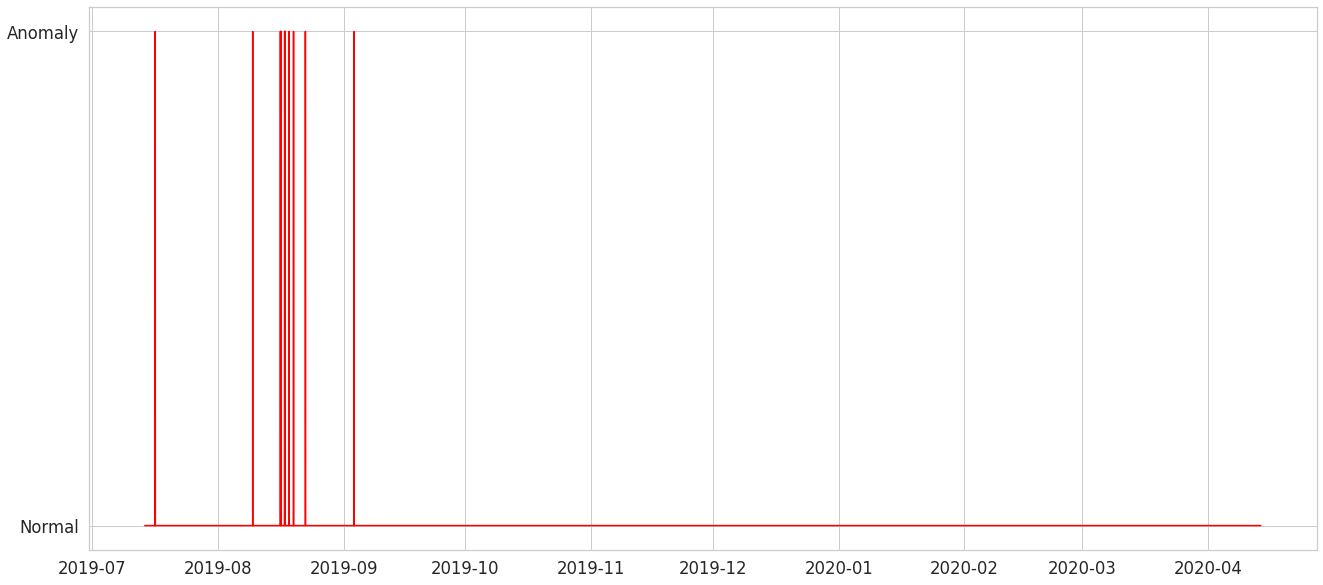

In [ ]:
pd.set_option('max_rows', 200)

def condition(x):
  if x > 0:
    return 'Anomaly'
  else:
    return 'Normal'
    
import dateutil.parser

#Till 14th July the readings are haphazard. 

current_df = pd.read_csv("/content/gdrive/MyDrive/Research_Projects/ML-Transformers/merged_power_load.csv", parse_dates=['DeviceTimeStamp'], index_col='DeviceTimeStamp')


current_df = current_df.iloc[current_df.index >= '2019-07-14 00:00:00']

display(current_df)
print(current_df.shape)

# plt.plot(current_df['IL1'], label='Phase 1 Current')
# plt.plot(current_df['IL2'], label='Phase 2 Current')
# plt.plot(current_df['IL3'], label='Phase 3 Current', color='orange')
# plt.plot(current_df['OTI'], label='Active Power', color='black')
plt.show()
# plt.plot(current_df['KWH'], label='Active Power')
# plt.plot(current_df['KVARH'], label='Reactive Power')
# plt.plot(current_df['KVA'], label='Apparent Power')
# plt.plot(current_df['KWH_I'], label='Active Power')
# plt.plot(current_df['KW'], label='Power')

df = current_df



df['Class'] = df['OTI_T'].apply(condition)
display(df)
plt.plot(df['Class'], label='Anomaly', color='red')

# Spectral Residual

In [ ]:
from alibi_detect.od import SpectralResidual
od = SpectralResidual(
threshold=1.,
window_amp=20,
window_local=20,
n_est_points=10,
n_grad_points=5
)

import matplotlib
current_df['scores'] = od.score(current_df['OTI'])
ax = pd.Series(current_df['OTI'], name='OTI').plot()
plt.plot(legend=False, figsize=(12, 6))

ax2 = ax.twinx()
ax = pd.Series(current_df['scores'], name='scores').plot(ax=ax2, legend=False,color="r", marker=matplotlib.markers.CARETDOWNBASE)
ax.figure.legend(bbox_to_anchor=(1, 1), loc='upper left');

plt.show()


ModuleNotFoundError: ignored

#Univariate

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
TIME_STEPS = 48 #1 DAY (96) RIGHT NOW, 15 MIN INTERVALS
X_train, y_train = create_dataset(train_data[['OTI']], train_data.OTI, TIME_STEPS)
X_test, y_test = create_dataset(train_data[['OTI']], train_data.OTI, TIME_STEPS)

In [ ]:
X_train.shape
print(y_train.shape)

(14217,)


### LSTM Autoencoder

In [ ]:
#Train a model, we measure the predictive error. We set a threshold, this is likely an anomaly. 

def lstm_v1(X_train):
  
  model = keras.Sequential()
  model.add(keras.layers.LSTM(units=128, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True))
  model.add(keras.layers.LSTM(units=64, return_sequences=False))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
  model.add(keras.layers.LSTM(units=64, return_sequences=True))
  model.add(keras.layers.LSTM(units=128, return_sequences=True))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))

  model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
  return model


def lstm_v2(X_train):
  
  model = keras.Sequential()
  model.add(keras.layers.LSTM(units=64, input_shape = (X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
  model.add(keras.layers.LSTM(units=64, return_sequences=True))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))

  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model



In [ ]:
model = lstm_v2(X_train)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, shuffle=False)

Epoch 1/10
356/356 [==============================] - 8s 14ms/step - loss: 0.4584 - mae: 0.4584 - val_loss: 0.4633 - val_mae: 0.4633
Epoch 2/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4580 - mae: 0.4580 - val_loss: 0.4633 - val_mae: 0.4633
Epoch 3/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4579 - mae: 0.4579 - val_loss: 0.4632 - val_mae: 0.4632
Epoch 4/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4578 - mae: 0.4578 - val_loss: 0.4632 - val_mae: 0.4632
Epoch 5/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4578 - mae: 0.4578 - val_loss: 0.4632 - val_mae: 0.4632
Epoch 6/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4577 - mae: 0.4577 - val_loss: 0.4631 - val_mae: 0.4631
Epoch 7/10
356/356 [==============================] - 3s 9ms/step - loss: 0.4577 - mae: 0.4577 - val_loss: 0.4631 - val_mae: 0.4631
Epoch 8/10
356/356 [==============================] - 4s 11ms/step - loss: 

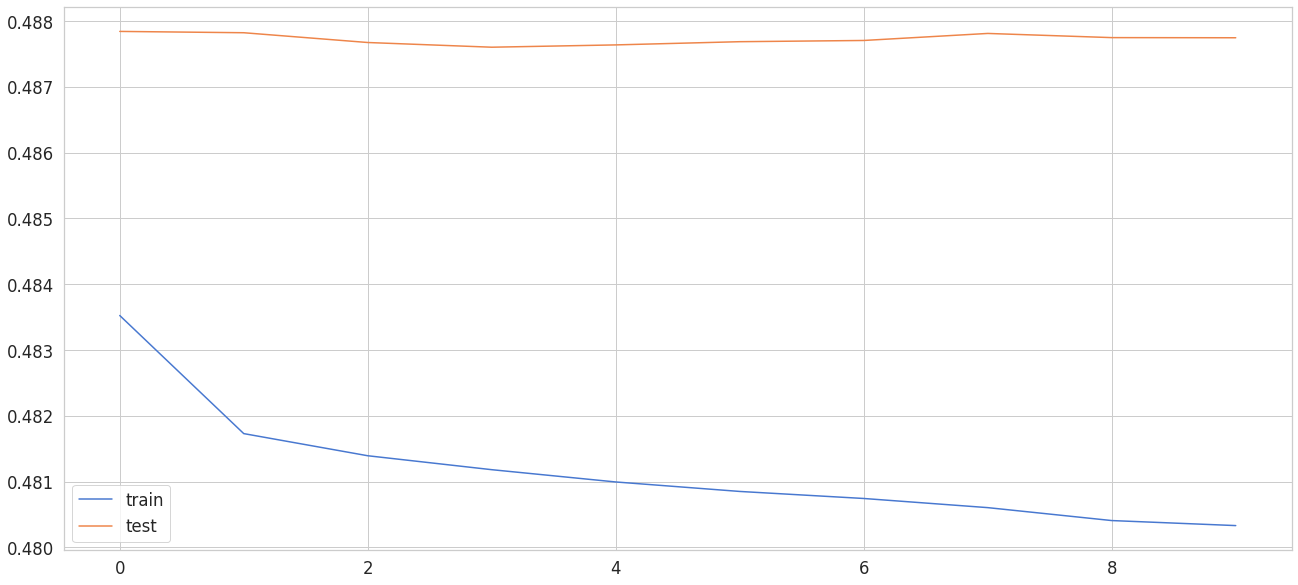

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred, X_train), axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True)


NameError: ignored

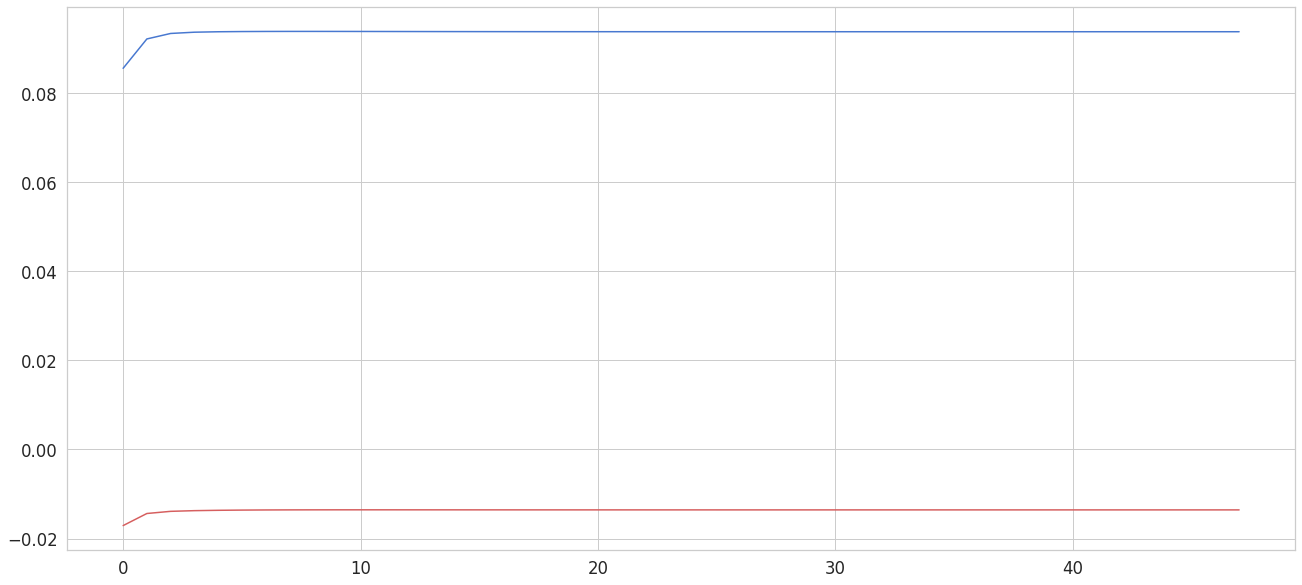

In [ ]:
X_train_pred = model.predict(X_train)
plt.plot(X_train_pred[0], 'r')
plt.plot(X_train[0], 'b')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



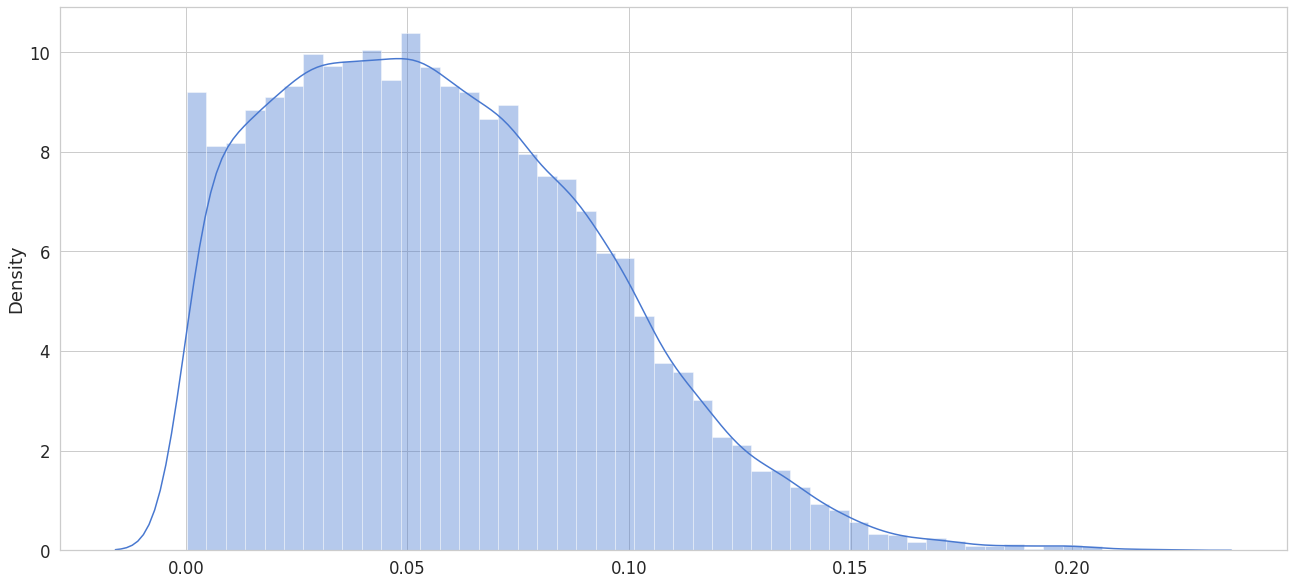

In [ ]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred, X_test), axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True)

In [ ]:
THRESHOLD = 0.6

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['OTI'] = test[TIME_STEPS:].OTI

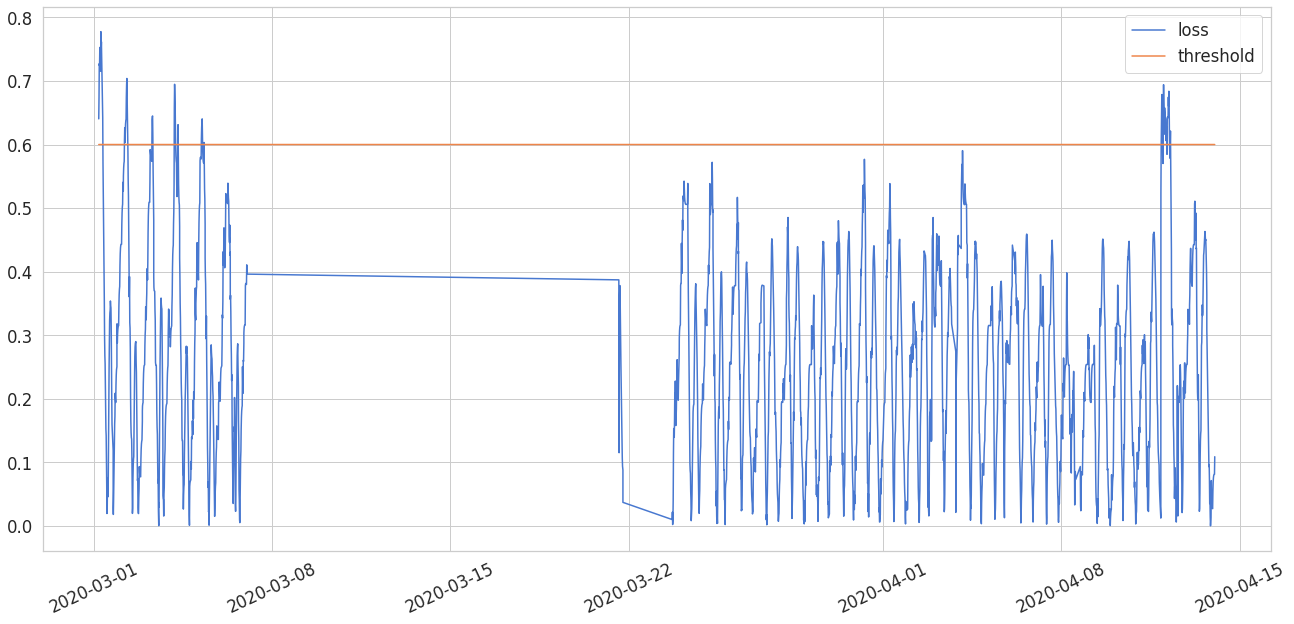

In [ ]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()

In [ ]:
anomalies = test_score_df[test_score_df.anomaly == True]

(15109, 48, 1)
(15109,)


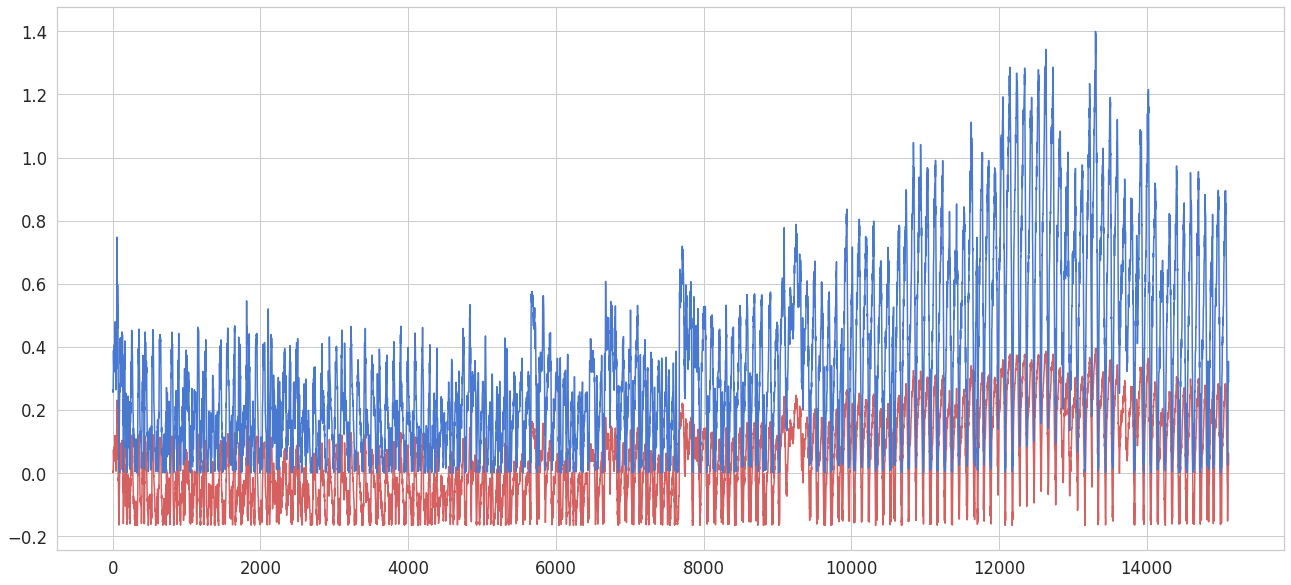

In [ ]:
X_train_pred = model.predict(X_train)
print(X_train_pred.shape)
print(y_train.shape)
plt.plot(X_train_pred[:,0,0], 'r')
plt.plot(X_train[:,0,0], 'b')
plt.show()

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# def smape(A, F):
#     return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)

def regression_metrics(expected, predicted):
  errors = mean_squared_error(expected, predicted)
  print('MSE:', errors)
  errors = mean_squared_error(expected, predicted, squared=False)
  print('RMSE:', errors)
  errors = mean_absolute_error(expected, predicted)
  print('MAE:', errors)
  errors = smape(expected,predicted)
  print('SMAPE:', errors)
  errors = r2_score(expected,predicted)
  print('R2:', errors)

  
print('TRAIN')
regression_metrics(y_train, X_train_pred[:,0,0])
print('-------------------')
print('TEST')
regression_metrics(y_test, X_test_pred[:,0,0])
print('-------------------')


TRAIN
MSE: 1.121698395859726
RMSE: 1.0591026370752392
MAE: 0.565705510744464
SMAPE: 186.84918207681397
R2: -0.11852292478293158
-------------------
TEST
MSE: 0.15920205610377478
RMSE: 0.39900132343611944
MAE: 0.28932176182031033
SMAPE: 100.66559738224927
R2: 0.46004890307435187
-------------------


In [ ]:
test_x_predictions = model.predict(X_test)
mse, mae, rmse, smapev, r2 = regression_metrics(X_test[:,0,0], test_x_predictions[:,0,0])
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_labels['OTI_T']})

MSE: 0.07475360933846374
RMSE: 0.27341106294088346
MAE: 0.26368188837044676
SMAPE: 171.0632523078933
R2: -1.7183064663490875


TypeError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(train[['OTI']])
train['OTI'] = scaler.transform(train[['OTI']])
test['OTI'] = scaler.transform(test[['OTI']])

scaler = StandardScaler()
scaler = scaler.fit(train[['IL1']])
train['IL1'] = scaler.transform(train[['IL1']])
test['IL1'] = scaler.transform(test[['IL1']])

scaler = StandardScaler()
scaler = scaler.fit(train[['IL2']])
scaler = scaler.fit(train[['IL2']])
train['IL2'] = scaler.transform(train[['IL2']])
test['IL2'] = scaler.transform(test[['IL2']])

scaler = StandardScaler()
scaler = scaler.fit(train[['IL3']])
train['IL3'] = scaler.transform(train[['IL3']])
test['IL3'] = scaler.transform(test[['IL3']])





NameError: ignored

In [ ]:
threshold_fixed =0.6
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomalous" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

NameError: ignored

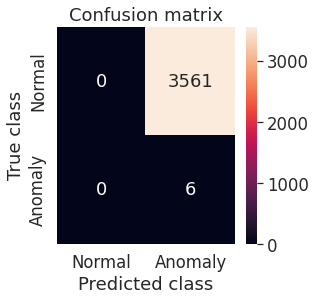

 Accuracy:  0.001682085786375105
 Recall:  1.0
 Precision:  0.001682085786375105


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

threshold_fixed =0.96
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))

#Multivariate Anomaly Detection

In [ ]:
!pip install statsmodels

##Checking for stationarity


### ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts_data, signif=0.05):
    series=ts_data
    print(series)
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
      print('Critial Values:')      
      print(f'   {key}, {value}')
    (test_result)
print('IL1')
test_stationarity(df['IL1'].values)
print('IL2')
test_stationarity(df['IL2'].values)
print('IL3')
test_stationarity(df['IL3'].values)
print('OTI')
test_stationarity(df['OTI'].values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



IL1
[66.4 58.  53.7 ... 77.4 70.1 59.2]
ADF Statistic: -18.24577171177972
n_lags: 2.3491816641157826e-30
p-value: 2.3491816641157826e-30
Critial Values:
   1%, -3.430717697980211
Critial Values:
   5%, -2.8617025084705445
Critial Values:
   10%, -2.566856499011881
IL2
[45.1 43.5 43.8 ... 37.1 36.7 33.1]
ADF Statistic: -16.20396940789933
n_lags: 4.0501981075936183e-29
p-value: 4.0501981075936183e-29
Critial Values:
   1%, -3.430717697980211
Critial Values:
   5%, -2.8617025084705445
Critial Values:
   10%, -2.566856499011881
IL3
[76.7 68.5 63.6 ... 75.4 88.1 86.8]
ADF Statistic: -18.33297213965854
n_lags: 2.2538995696424117e-30
p-value: 2.2538995696424117e-30
Critial Values:
   1%, -3.430717697980211
Critial Values:
   5%, -2.8617025084705445
Critial Values:
   10%, -2.566856499011881
OTI
[25. 25. 25. ... 31. 30. 30.]
ADF Statistic: -19.053312020931156
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4307172024424055
Critial Values:
   5%, -2.8617022894752955
Critial Values:
   10%, -

### KPSS 

IL1
Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic         11.594732
p-value                 0.010000
Lags Used              44.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 

IL2
Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic         19.269368
p-value                 0.010000
Lags Used              44.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 

IL3
Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statist

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated 

In [ ]:
df.head()

,Unnamed: 0,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,Anomaly
DeviceTimeStamp,,,,,,,,,,,,,,,,,,,
2019-07-14 00:00:00,2632,241.0,241.9,240.8,66.4,45.1,76.7,417.7,417.1,416.6,27.9,25.0,0.0,24.0,40.0,0.0,0.0,1.0,0.0
2019-07-14 00:15:00,2633,241.9,242.7,241.7,58.0,43.5,68.5,418.5,418.1,417.6,22.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0,0.0
2019-07-14 00:30:00,2634,241.2,241.8,240.8,53.7,43.8,63.6,420.0,419.6,419.3,16.7,25.0,0.0,24.0,40.0,0.0,0.0,1.0,0.0
2019-07-14 00:45:00,2635,240.8,241.5,240.4,47.9,38.5,66.2,417.4,416.8,416.4,24.2,25.0,0.0,24.0,40.0,0.0,0.0,1.0,0.0
2019-07-14 01:00:00,2636,241.5,242.3,241.4,52.4,41.9,64.4,417.9,417.7,417.3,19.2,22.0,0.0,24.0,40.0,0.0,0.0,1.0,0.0


## Plotting Normal vs Anomaly

Normal     17799
Anomaly       33
Name: Class, dtype: int64


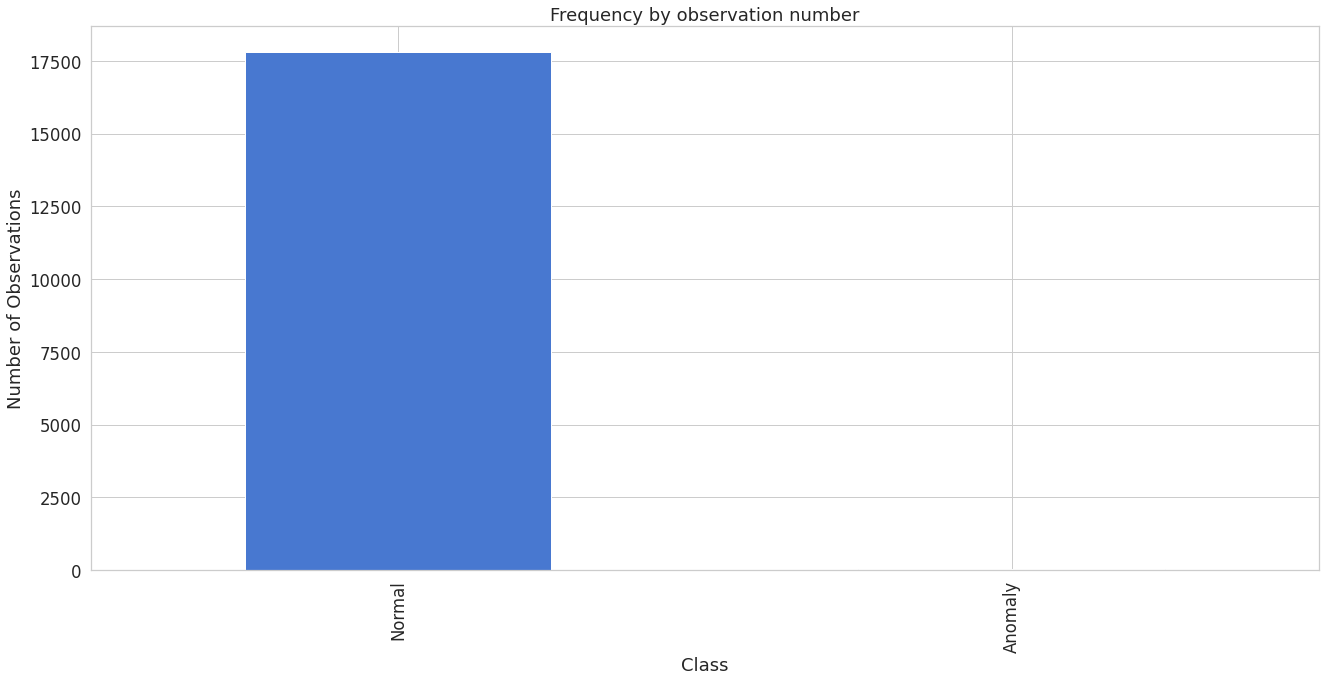

count    17832.000000
mean        29.780227
std         11.286063
min         11.000000
25%         25.000000
50%         29.000000
75%         33.000000
max        248.000000
Name: OTI, dtype: float64


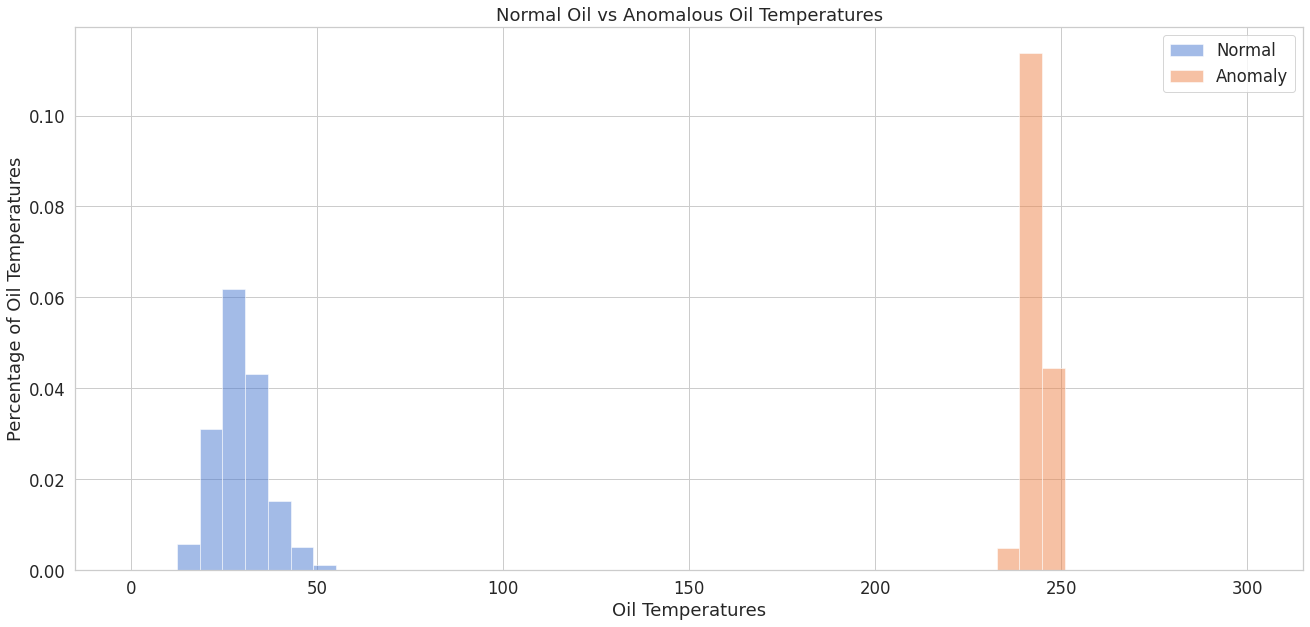

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=90)
plt.xticks(range(len(df['Class'].unique())), df.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")
print(df['Class'].value_counts())
plt.show()

print(df['OTI'].describe())


normal_dataset = df[df.Class == 'Normal'] 
fraud_dataset = df[df.Class == 'Anomaly']

bins = np.linspace(0, 300, 50)
plt.hist(normal_dataset.OTI, bins=bins, alpha=0.5, density=True, label='Normal')
plt.hist(fraud_dataset.OTI, bins=bins, alpha=0.5, density=True, label='Anomaly')
plt.legend(loc='upper right')
plt.title("Normal Oil vs Anomalous Oil Temperatures")
plt.xlabel("Oil Temperatures")
plt.ylabel("Percentage of Oil Temperatures");
plt.show()

## One Class Anomaly Detection (Univariate)


In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

one_class_data = df[['OTI']].copy()
one_class_labels = df[['Class']].copy()

le = LabelEncoder()
one_class_labels = le.fit_transform(one_class_labels)


one_train_data, one_test_data, one_train_labels, one_test_labels = train_test_split(
    one_class_data, one_class_labels, test_size=0.25, random_state=42, stratify=one_class_labels
)

print('The number of records in the training dataset is', one_train_data.shape[0])
print('The number of records in the test dataset is', one_test_data.shape[0])
print(f"The training dataset has {sorted(Counter(one_train_labels).items())[0][1]} records for the majority class and {sorted(Counter(one_train_labels).items())[1][1]} records for the minority class.")
print(f"The training dataset has {sorted(Counter(one_test_labels).items())[0][1]} records for the majority class and {sorted(Counter(one_test_labels).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 13374
The number of records in the test dataset is 4458
The training dataset has 25 records for the majority class and 13349 records for the minority class.
The training dataset has 8 records for the majority class and 4450 records for the minority class.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train the one class support vector machine (SVM) model
# one_class_svm = OneClassSVM(nu=0.001, kernel = 'rbf', gamma = 'auto').fit(one_train_data)
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(one_train_data)
prediction = one_class_svm.predict(one_test_data)

# Change the anomalies' values to make it consistent with the true values
prediction = [0 if i==-1 else 1 for i in prediction]
# prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performance
print(classification_report(one_test_labels, prediction))
#captures 29% of anomalies

              precision    recall  f1-score   support

           0       0.00      1.00      0.01         8
           1       1.00      0.48      0.65      4450

    accuracy                           0.48      4458
   macro avg       0.50      0.74      0.33      4458
weighted avg       1.00      0.48      0.65      4458



In [ ]:
score = one_class_svm.score_samples(one_test_data)
print(score)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

# Check the model performance at 2% threshold
customized_prediction = [0 if i < score_threshold else 1 for i in score]
# customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(one_test_labels, customized_prediction))

[4.7297007  4.72996564 4.72967298 ... 4.72963421 4.72936459 4.73001866]
The customized score threshold for 2% of outliers is 4.73
              precision    recall  f1-score   support

           0       0.04      0.50      0.08         8
           1       1.00      0.98      0.99      4450

    accuracy                           0.98      4458
   macro avg       0.52      0.74      0.54      4458
weighted avg       1.00      0.98      0.99      4458



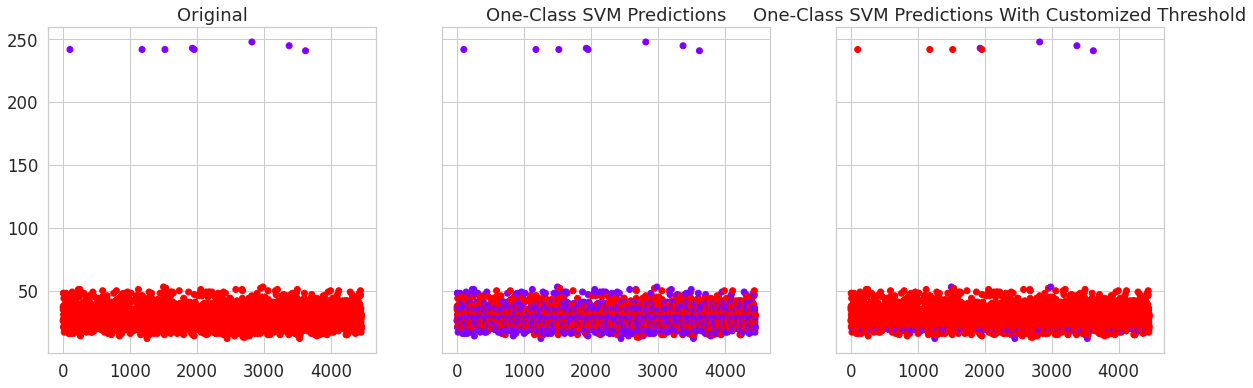

In [ ]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(one_test_data.values, columns=['feature1'])
df_test['y_test'] = one_test_labels
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
x = list(range(len(df_test['feature1'])))
# Ground truth
ax0.set_title('Original')
ax0.scatter(x, df_test['feature1'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(x, df_test['feature1'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(x, df_test['feature1'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

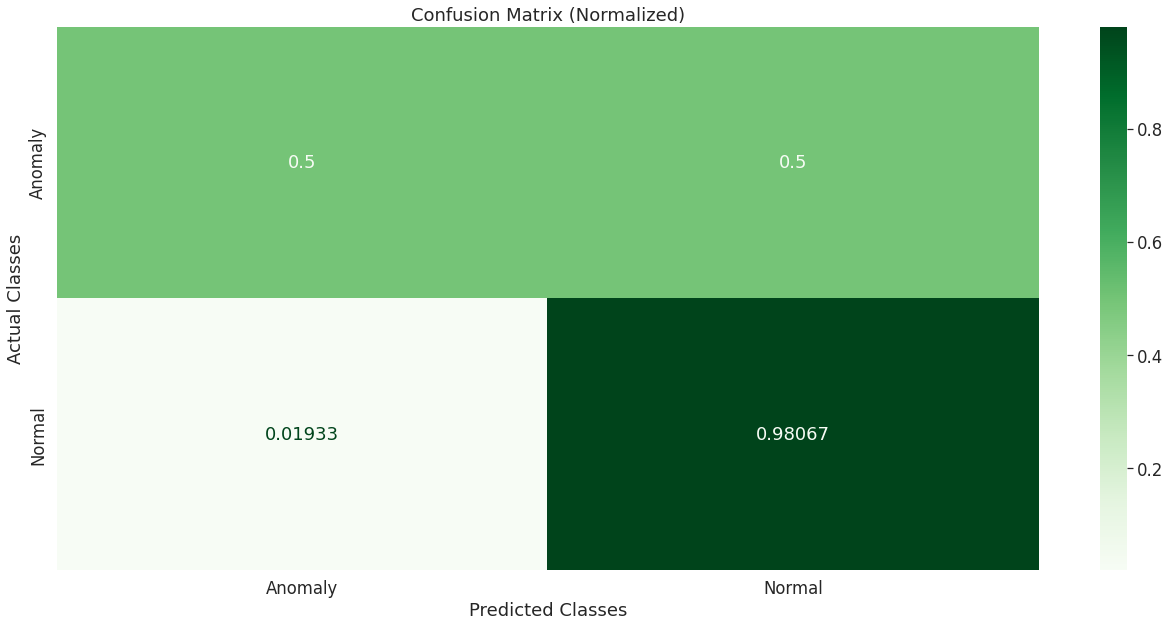

In [ ]:
import pycm
cm = pycm.ConfusionMatrix(actual_vector=1-np.array(one_test_labels).astype(float), predict_vector=1-np.array(customized_prediction).astype(float))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
# print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

one_class_data = df[['OTI', 'IL1', 'IL2', 'IL3']].copy()
one_class_labels = df[['Class']].copy()

le = LabelEncoder()
one_class_labels = le.fit_transform(one_class_labels)


one_train_data, one_test_data, one_train_labels, one_test_labels = train_test_split(
    one_class_data, one_class_labels, test_size=0.25, random_state=42, stratify=one_class_labels
)

print('The number of records in the training dataset is', one_train_data.shape[0])
print('The number of records in the test dataset is', one_test_data.shape[0])
print(f"The training dataset has {sorted(Counter(one_train_labels).items())[0][1]} records for the majority class and {sorted(Counter(one_train_labels).items())[1][1]} records for the minority class.")
print(f"The training dataset has {sorted(Counter(one_test_labels).items())[0][1]} records for the majority class and {sorted(Counter(one_test_labels).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 13374
The number of records in the test dataset is 4458
The training dataset has 25 records for the majority class and 13349 records for the minority class.
The training dataset has 8 records for the majority class and 4450 records for the minority class.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## One Class Anomaly Detection (Multivariate)


In [ ]:
# Train the one class support vector machine (SVM) model
# one_class_svm = OneClassSVM(nu=0.001, kernel = 'rbf', gamma = 'auto').fit(one_train_data)
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(one_train_data)
prediction = one_class_svm.predict(one_test_data)

# Change the anomalies' values to make it consistent with the true values
prediction = [0 if i==-1 else 1 for i in prediction]
# prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performance
print(classification_report(one_test_labels, prediction))
#captures 29% of anomalies



              precision    recall  f1-score   support

           0       0.00      1.00      0.00         8
           1       1.00      0.05      0.10      4450

    accuracy                           0.05      4458
   macro avg       0.50      0.53      0.05      4458
weighted avg       1.00      0.05      0.10      4458



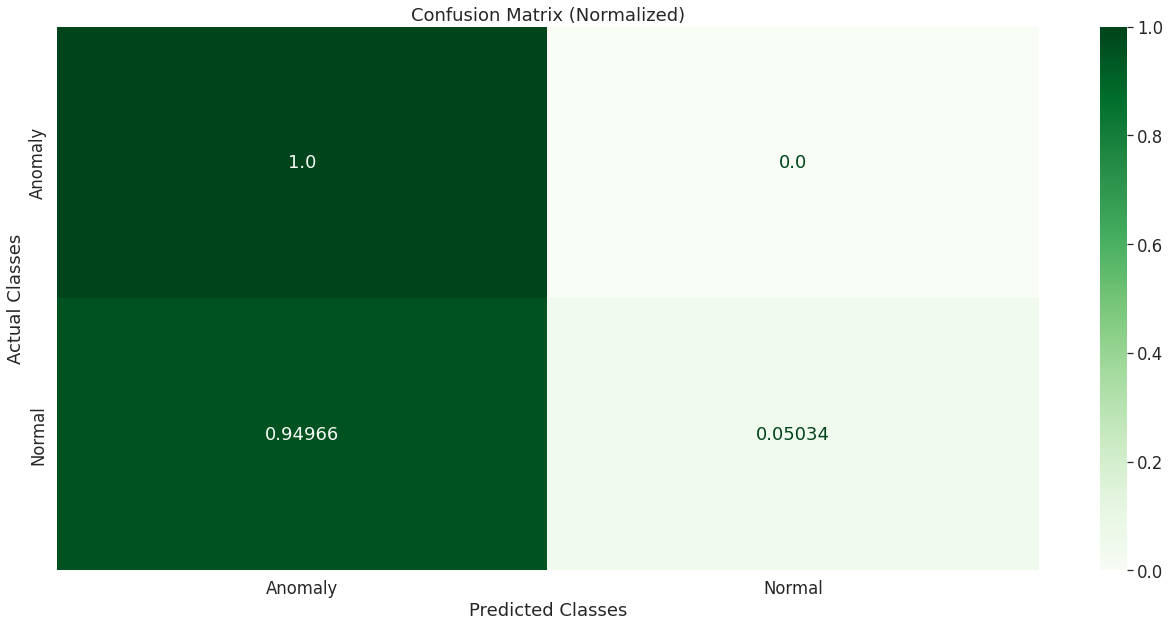

In [ ]:
import pycm
cm = pycm.ConfusionMatrix(actual_vector=1-np.array(one_test_labels).astype(float), predict_vector=1-np.array(prediction).astype(float))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
# print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

In [ ]:
score = one_class_svm.score_samples(one_test_data)
print(score)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 3)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

# Check the model performance at 2% threshold
customized_prediction = [0 if i < score_threshold else 1 for i in score]
# customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(one_test_labels, customized_prediction))


[6.52436431e-06 5.94515362e-04 1.00235309e-02 ... 1.51343537e-02
 3.82815504e-03 9.77039216e-03]
The customized score threshold for 2% of outliers is 0.00
              precision    recall  f1-score   support

           0       0.05      0.88      0.10         8
           1       1.00      0.97      0.99      4450

    accuracy                           0.97      4458
   macro avg       0.53      0.92      0.54      4458
weighted avg       1.00      0.97      0.98      4458



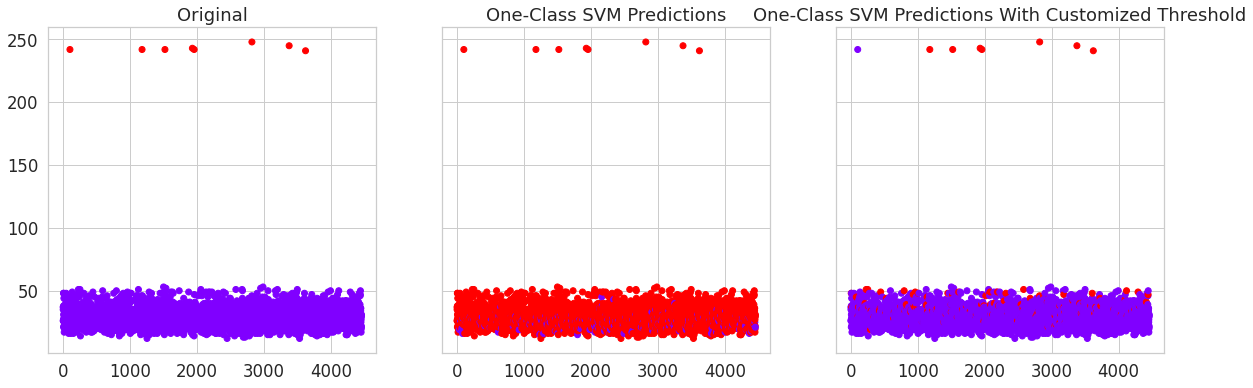

In [ ]:
# Put the testing dataset and predictions in the same dataframe
import matplotlib.pyplot as plt
import matplotlib.colors
df_test = pd.DataFrame(one_test_data[['OTI']].values, columns=['feature1'])
df_test['y_test'] = 1-np.array(one_test_labels)
df_test['one_class_svm_prediction'] = 1-np.array(prediction)
df_test['one_class_svm_prediction_cutomized'] = 1-np.array(customized_prediction)
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
x = list(range(len(df_test['feature1'])))
# Ground truth
ax0.set_title('Original')
ax0.scatter(x, df_test['feature1'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(x, df_test['feature1'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(x, df_test['feature1'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

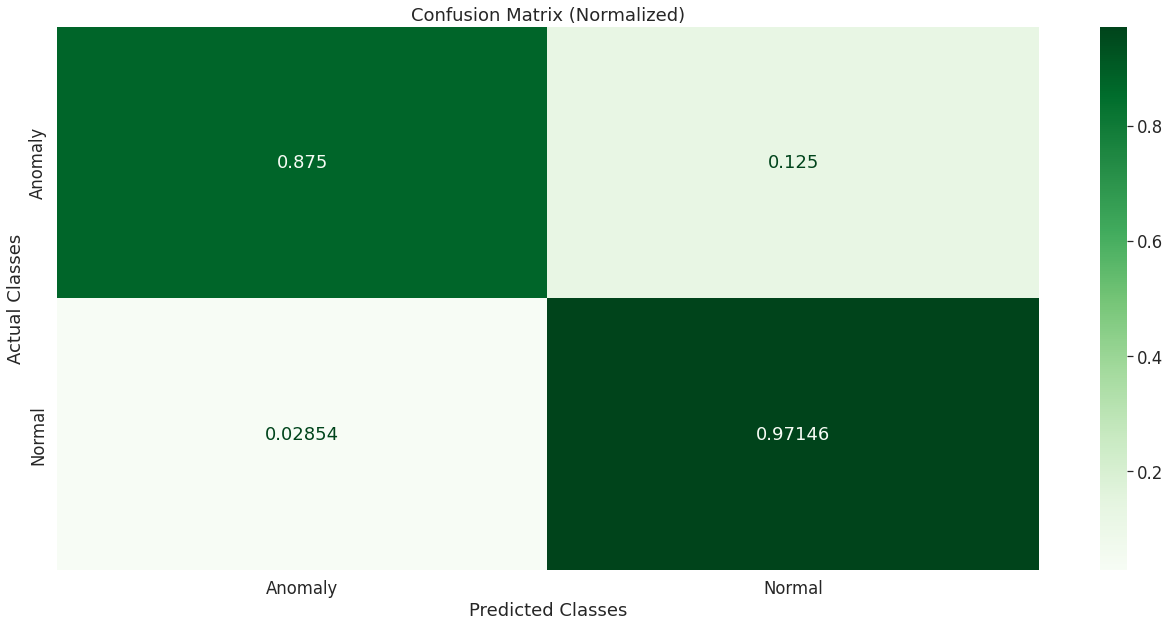

In [ ]:
import pycm
cm = pycm.ConfusionMatrix(actual_vector=1-np.array(one_test_labels).astype(float), predict_vector=1-np.array(customized_prediction).astype(float))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
# print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

## Isolation Forest (Multivariate)


In [ ]:
from sklearn.ensemble import IsolationForest


model =  IsolationForest(contamination=0.004)
model.fit(one_train_data)
prediction = model.predict(one_test_data)

# Change the anomalies' values to make it consistent with the true values
prediction = [0 if i==-1 else 1 for i in prediction]
# prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performance
print(classification_report(one_test_labels, prediction))
#captures 29% of anomalies


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.12      0.25      0.16         8
           1       1.00      1.00      1.00      4450

    accuracy                           1.00      4458
   macro avg       0.56      0.62      0.58      4458
weighted avg       1.00      1.00      1.00      4458



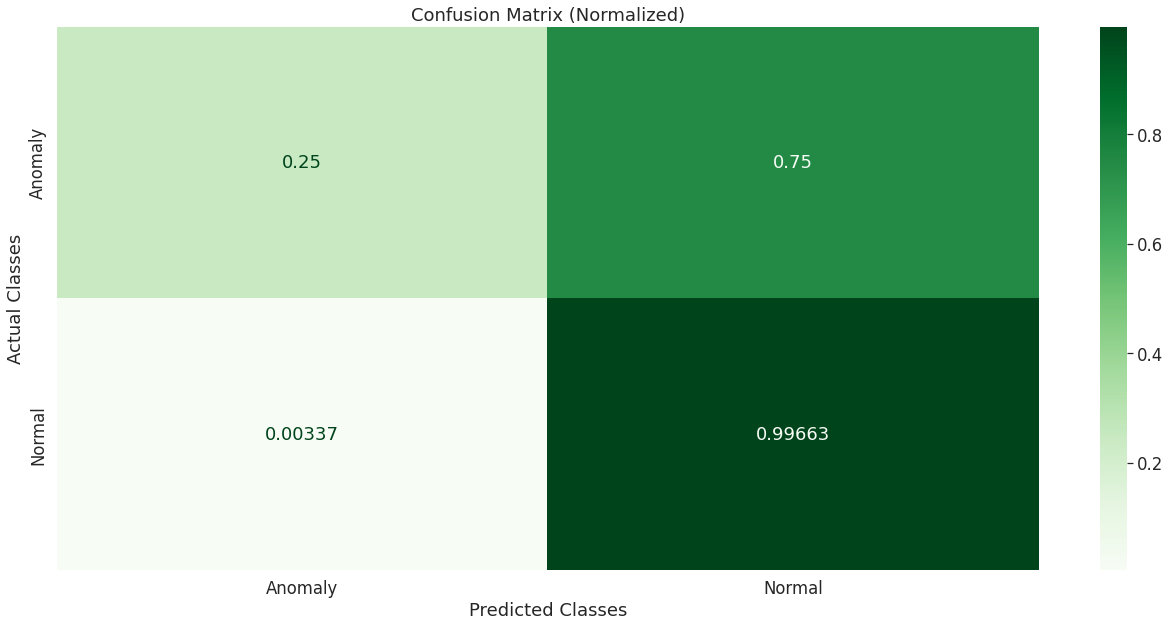

In [ ]:
import pycm
cm = pycm.ConfusionMatrix(actual_vector=1-np.array(one_test_labels).astype(float), predict_vector=1-np.array(prediction).astype(float))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
# print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

In [ ]:
score = model.score_samples(one_test_data)
print(score)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

# Check the model performance at 2% threshold
customized_prediction = [0 if i < score_threshold else 1 for i in score]
# customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(one_test_labels, customized_prediction))

[-0.48727371 -0.48799891 -0.41163644 ... -0.49255433 -0.42719967
 -0.4022174 ]
The customized score threshold for 2% of outliers is -0.59
              precision    recall  f1-score   support

           0       0.09      1.00      0.16         8
           1       1.00      0.98      0.99      4450

    accuracy                           0.98      4458
   macro avg       0.54      0.99      0.58      4458
weighted avg       1.00      0.98      0.99      4458



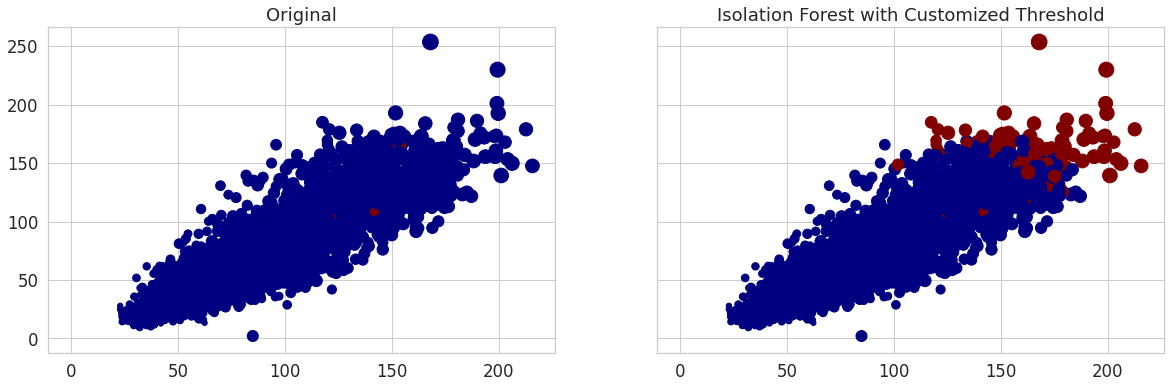

In [ ]:
# Put the testing dataset and predictions in the same dataframe
import matplotlib.pyplot as plt
import matplotlib.colors
df_test = pd.DataFrame(one_test_data[['OTI','IL1', 'IL2', 'IL3']].values, columns=['feature1', 'feature2', 'feature3', 'feature4'])
df_test['y_test'] = 1-np.array(one_test_labels)
df_test['one_class_svm_prediction'] = 1-np.array(prediction)
df_test['one_class_svm_prediction_cutomized'] = 1-np.array(customized_prediction)
# Visualize the actual and predicted anomalies
fig, (ax0, ax2)=plt.subplots(1,2, sharey=True, figsize=(20,6))

x = list(range(len(df_test['feature1'])))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature2'], df_test['feature3'], df_test['feature4'], c=df_test['y_test'], cmap='jet')
# One-Class SVM Predictions
# ax1.set_title('One-Class SVM Predictions')
# ax1.scatter(df_test['feature2'], df_test['feature3'], df_test['feature4'], c=df_test['one_class_svm_prediction'], cmap='jet')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('Isolation Forest with Customized Threshold')
ax2.scatter(df_test['feature2'], df_test['feature3'], df_test['feature4'], c=df_test['one_class_svm_prediction_cutomized'], cmap='jet')

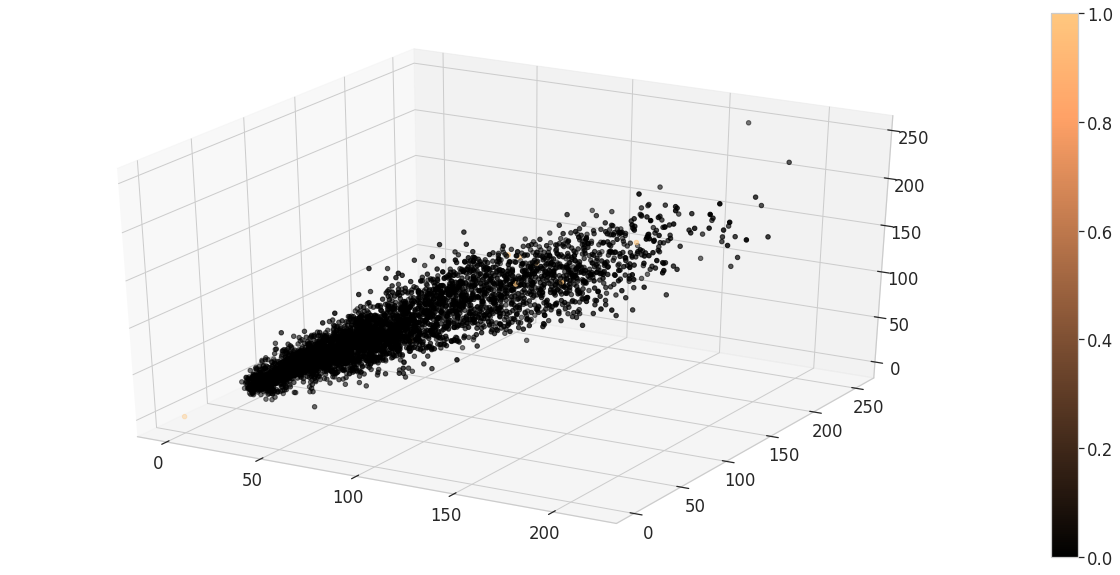

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_test['feature2']
y = df_test['feature3']
z = df_test['feature4']
c = df_test['y_test']

img = ax.scatter(x, y, z, c=c, cmap=plt.copper())
fig.colorbar(img)
plt.show()

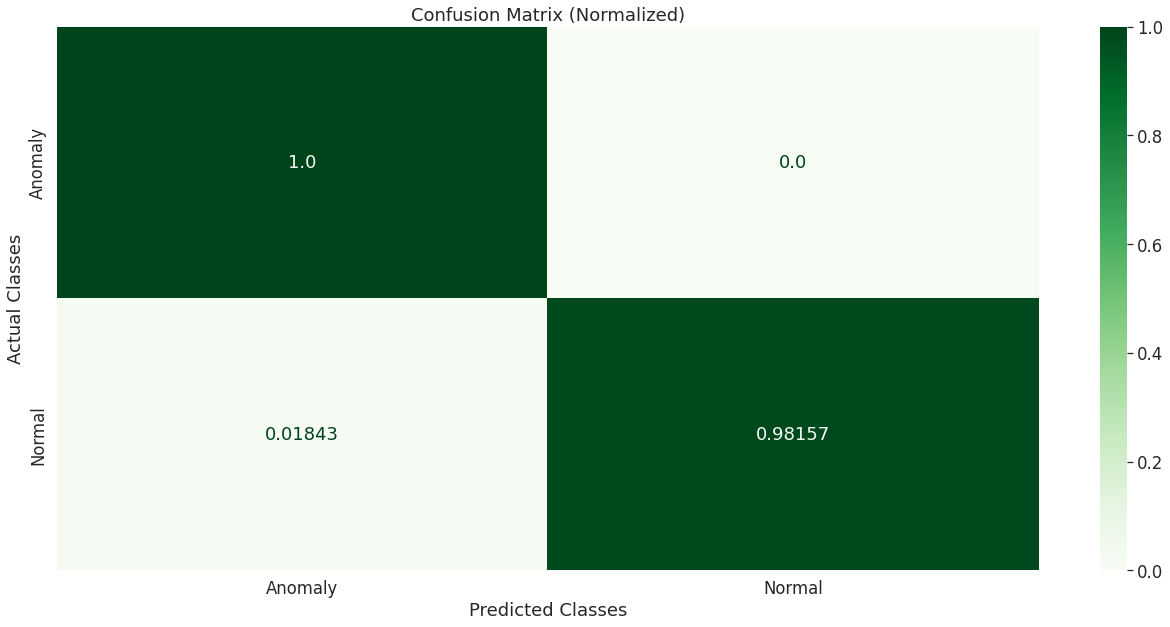

In [ ]:
import pycm
cm = pycm.ConfusionMatrix(actual_vector=1-np.array(one_test_labels).astype(float), predict_vector=1-np.array(customized_prediction).astype(float))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
# print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

##Standard Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df[['OTI']])
df['OTI'] = scaler.transform(df[['OTI']])

scaler = StandardScaler()
scaler = scaler.fit(df[['IL1']])
df['IL1'] = scaler.transform(df[['IL1']])

scaler = StandardScaler()
scaler = scaler.fit(df[['IL2']])
df['IL2'] = scaler.transform(df[['IL2']])

scaler = StandardScaler()
scaler = scaler.fit(df[['IL3']])
df['IL3'] = scaler.transform(df[['IL3']])



## Train Test Split

In [ ]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train_data, test_data = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train_data.shape, test_data.shape)

(14265, 19) (3567, 19)


In [ ]:
def create_dataset(X, y, time_steps=1, others=[]):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
TIME_STEPS = 96 #1 DAY RIGHT NOW, 15 MIN INTERVALS
X_train_mul, y_train_mul = create_dataset(train_data[['OTI', 'IL1', 'IL2', 'IL3']], train_data.OTI, TIME_STEPS, others= ['OTI', 'IL1', 'IL2', 'IL3'])
X_test_mul, y_test_mul = create_dataset(test_data[['OTI','IL1', 'IL2', 'IL3']], test_data.OTI, TIME_STEPS, others = ['OTI', 'IL1', 'IL2', 'IL3'])

In [ ]:
TIME_STEPS = 96 #1 DAY RIGHT NOW, 15 MIN INTERVALS
X_train_mul_data, y_train_mul_data = create_dataset(train_data[['OTI', 'IL1', 'IL2', 'IL3', 'Class']], train_data.OTI, TIME_STEPS, others= ['OTI', 'IL1', 'IL2', 'IL3'])
X_test_mul_data, y_test_mul_data = create_dataset(test_data[['OTI','IL1', 'IL2', 'IL3', 'Class']], test_data.OTI, TIME_STEPS, others = ['OTI', 'IL1', 'IL2', 'IL3'])

In [ ]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], 1) #for RNN
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1) #for RNN

print(X_train_mul.shape)
print(y_train_mul.shape)


print(X_test_mul.shape)
print(y_test_mul.shape)



(14169, 96, 4)
(14169,)
(3471, 96, 4)
(3471,)


In [ ]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.5,
           patience=1, verbose=1),
    keras.callbacks.EarlyStopping(patience=8, verbose=1)
]

## VARIMA

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=X_train_mul)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LinAlgError: ignored

## LSTM-AE

In [ ]:

def lstm_v2(X_train, y_train_mul):
  model =  keras.Sequential()
  model.add(keras.layers.GRU(32,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.GRU(units=16))
  
  model.add(keras.layers.RepeatVector(n=X_train.shape[1]))

  model.add(keras.layers.GRU(units=16,return_sequences=True))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.GRU(units=32,return_sequences=True))
  model.add((keras.layers.Dense(units=1,activation='linear')))
  model.compile(loss='mae', optimizer='adam',metrics=['mae'])
  return model



In [ ]:
model = lstm_v2(X_train_mul, y_train_mul)
history = model.fit(X_train_mul, y_train_mul, epochs=20, batch_size=16, validation_split=0.2, shuffle=False, callbacks=callbacks)

Epoch 1/20
709/709 [==============================] - 24s 19ms/step - loss: 0.2456 - mae: 0.2456 - val_loss: 0.2138 - val_mae: 0.2138 - lr: 0.0010
Epoch 2/20
709/709 [==============================] - 13s 18ms/step - loss: 0.2261 - mae: 0.2261 - val_loss: 0.2116 - val_mae: 0.2116 - lr: 0.0010
Epoch 3/20
709/709 [==============================] - 12s 17ms/step - loss: 0.2228 - mae: 0.2228 - val_loss: 0.2004 - val_mae: 0.2004 - lr: 0.0010
Epoch 4/20
709/709 [==============================] - 12s 17ms/step - loss: 0.2203 - mae: 0.2203 - val_loss: 0.1952 - val_mae: 0.1952 - lr: 0.0010
Epoch 5/20
709/709 [==============================] - 13s 18ms/step - loss: 0.2186 - mae: 0.2186 - val_loss: 0.1862 - val_mae: 0.1862 - lr: 0.0010
Epoch 6/20
709/709 [==============================] - 12s 18ms/step - loss: 0.2169 - mae: 0.2169 - val_loss: 0.1961 - val_mae: 0.1961 - lr: 0.0010
Epoch 7/20
709/709 [==============================] - 13s 18ms/step - loss: 0.2159 - mae: 0.2159 - val_loss: 0.1953 - 

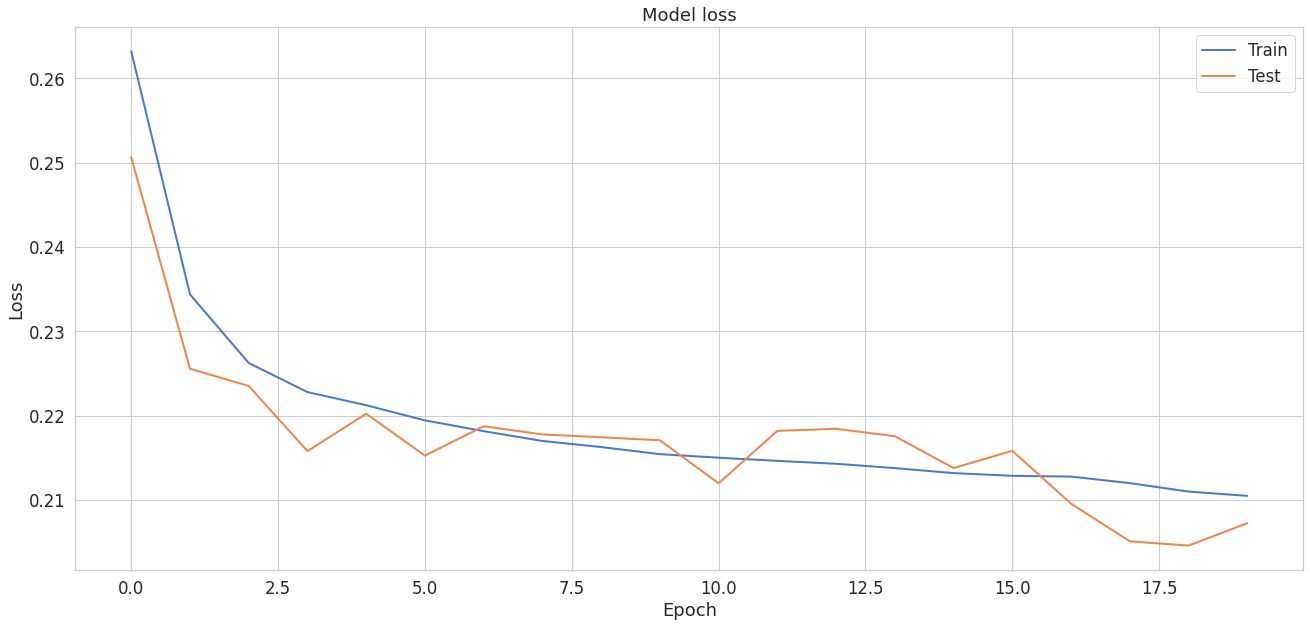

In [ ]:
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

## Bidirectional-LSTM

In [ ]:
from keras.layers import Conv1D, MaxPool1D, MaxPool2D, Flatten, LSTM, Conv2D, Reshape, Bidirectional, Layer, concatenate, Flatten, Lambda, Concatenate

In [ ]:

def bi_lstm_v2(X_train, y_train_mul):
    
  model = keras.Sequential()
  model.add(Bidirectional(keras.layers.GRU(units=32, input_shape = (X_train.shape[1], X_train.shape[2]))))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
  model.add(Bidirectional(keras.layers.GRU(units=32, return_sequences=True)))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=1,activation='linear')))

  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model


In [ ]:
model = bi_lstm_v2(X_train_mul, y_train_mul)
history = model.fit(X_train_mul, y_train_mul, epochs=10, batch_size=16, validation_split=0.2, shuffle=False,callbacks=callbacks)

Epoch 1/10
709/709 [==============================] - 20s 19ms/step - loss: 0.2544 - mae: 0.2544 - val_loss: 0.1979 - val_mae: 0.1979 - lr: 0.0010
Epoch 2/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2261 - mae: 0.2261 - val_loss: 0.1940 - val_mae: 0.1940 - lr: 0.0010
Epoch 3/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2216 - mae: 0.2216 - val_loss: 0.1737 - val_mae: 0.1737 - lr: 0.0010
Epoch 4/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2195 - mae: 0.2195 - val_loss: 0.1885 - val_mae: 0.1885 - lr: 0.0010
Epoch 5/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2186 - mae: 0.2186 - val_loss: 0.1901 - val_mae: 0.1901 - lr: 0.0010
Epoch 6/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2177 - mae: 0.2177 - val_loss: 0.1846 - val_mae: 0.1846 - lr: 0.0010
Epoch 7/10
709/709 [==============================] - 12s 17ms/step - loss: 0.2173 - mae: 0.2173 - val_loss: 0.1805 - 

## LSTM Cell

In [ ]:
def lstm_cell(X_train, y_train_mul):
  model =  keras.Sequential()
  model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dropout(0.25))
  model.add(LSTM(units=32,return_sequences=True))
  model.add(keras.layers.Dropout(0.20))
  model.add(LSTM(units=16,return_sequences=False))
  model.add(keras.layers.Dense(units=1, activation='linear'))
  model.compile(loss='mae', optimizer='adam',metrics=['mae'])
  return model

In [ ]:
model = lstm_cell(X_train_mul, y_train_mul)
history = model.fit(X_train_mul, y_train_mul, epochs=5, batch_size=16, validation_split=0.2, shuffle=False, callbacks=callbacks)

Epoch 1/5
709/709 [==============================] - 77s 101ms/step - loss: 0.2235 - mae: 0.2235 - val_loss: 0.2077 - val_mae: 0.2077 - lr: 0.0010
Epoch 2/5
709/709 [==============================] - 10s 15ms/step - loss: 0.1719 - mae: 0.1719 - val_loss: 0.1563 - val_mae: 0.1563 - lr: 0.0010
Epoch 3/5
709/709 [==============================] - 10s 15ms/step - loss: 0.1523 - mae: 0.1523 - val_loss: 0.1303 - val_mae: 0.1303 - lr: 0.0010
Epoch 4/5
709/709 [==============================] - 10s 15ms/step - loss: 0.1431 - mae: 0.1431 - val_loss: 0.1505 - val_mae: 0.1505 - lr: 0.0010
Epoch 5/5
709/709 [==============================] - 10s 15ms/step - loss: 0.1381 - mae: 0.1381 - val_loss: 0.1303 - val_mae: 0.1303 - lr: 0.0010


## GRU Cell

In [ ]:
def gru_cell(X_train, y_train_mul):
  model =  keras.Sequential()
  model.add(keras.layers.GRU(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dropout(0.25))
  model.add(keras.layers.GRU(units=32,return_sequences=True))
  model.add(keras.layers.Dropout(0.20))
  model.add(keras.layers.GRU(units=16,return_sequences=False))
  model.add(keras.layers.Dense(units=1, activation='linear'))
  model.compile(loss='mae', optimizer='adam',metrics=['mae'])
  return model

In [ ]:
model = gru_cell(X_train_mul, y_train_mul)
history = model.fit(X_train_mul, y_train_mul, epochs=10, batch_size=16, validation_split=0.2, shuffle=False, callbacks=callbacks)

Epoch 1/10
709/709 [==============================] - 22s 15ms/step - loss: 0.1742 - mae: 0.1742 - val_loss: 0.0857 - val_mae: 0.0857 - lr: 0.0010
Epoch 2/10
709/709 [==============================] - 10s 15ms/step - loss: 0.1446 - mae: 0.1446 - val_loss: 0.1313 - val_mae: 0.1313 - lr: 0.0010
Epoch 3/10
709/709 [==============================] - 12s 16ms/step - loss: 0.1393 - mae: 0.1393 - val_loss: 0.0905 - val_mae: 0.0905 - lr: 0.0010
Epoch 4/10
709/709 [==============================] - 11s 15ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.0868 - val_mae: 0.0868 - lr: 0.0010
Epoch 5/10
709/709 [==============================] - 9s 13ms/step - loss: 0.1352 - mae: 0.1352 - val_loss: 0.1293 - val_mae: 0.1293 - lr: 0.0010
Epoch 6/10
709/709 [==============================] - 9s 13ms/step - loss: 0.1350 - mae: 0.1350 - val_loss: 0.1214 - val_mae: 0.1214 - lr: 0.0010
Epoch 7/10
705/709 [============================>.] - ETA: 0s - loss: 0.1356 - mae: 0.1356
Epoch 7: ReduceLROnPlateau re

## LASSO

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)
model.fit(X_train_mul.reshape(X_train_mul.shape[0], X_train_mul.shape[2]*X_train_mul.shape[1]), y_train_mul)

Lasso()

##Reconstruction error for anomalies

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)

def regression_metrics(expected, predicted):
  mae = mean_absolute_error(expected, predicted)
  print('MAE:', mae)
  smapev = smape(expected,predicted)
  mse = mean_squared_error(expected, predicted)  
  print('MSE:', mse)
  rmse = mean_squared_error(expected, predicted, squared=False)
  print('RMSE:', rmse)
  print('SMAPE:', smapev)
  r2 = r2_score(expected,predicted)
  print('R2:', r2)
  return mse, rmse, mae, smapev, r2

  
# print('TRAIN')
# regression_metrics(X_train_mul, test_x_predictions[:,0,0])
# print('-------------------')
# print('TEST')
# regression_metrics(X_test_mul[:,0,0], test_x_predictions[:,0,0])
# print('-------------------')

In [ ]:
test_x_predictions = model.predict(X_test_mul)
mse, mae, rmse, smapev, r2 = regression_metrics(X_test_mul[:,0,0], test_x_predictions[:,0,0])

MAE: 0.2375632961609953
MSE: 0.12105287388522505
RMSE: 0.34792653518411765
SMAPE: 75.49753084832717
R2: 0.6464818484300148


## Fitting the Train Distribution

In [ ]:
print(X_train_pred.shape)
print(X_train_mul[:,:,0])
print(train_data[['OTI']].values)

(14169, 1)
[[-0.42356315 -0.42356315 -0.42356315 ... -0.15774114 -0.15774114
  -0.24634847]
 [-0.42356315 -0.42356315 -0.42356315 ... -0.15774114 -0.24634847
  -0.24634847]
 [-0.42356315 -0.42356315 -0.68938516 ... -0.24634847 -0.24634847
  -0.42356315]
 ...
 [-0.86659984 -0.86659984 -0.95520718 ... -0.68938516 -0.68938516
  -0.68938516]
 [-0.86659984 -0.95520718 -0.86659984 ... -0.68938516 -0.68938516
  -0.68938516]
 [-0.95520718 -0.86659984 -0.7779925  ... -0.68938516 -0.68938516
  -0.60077783]]
[[-0.42356315]
 [-0.42356315]
 [-0.42356315]
 ...
 [-0.68938516]
 [-0.60077783]
 [-0.60077783]]


(14169, 1)
(14169,)


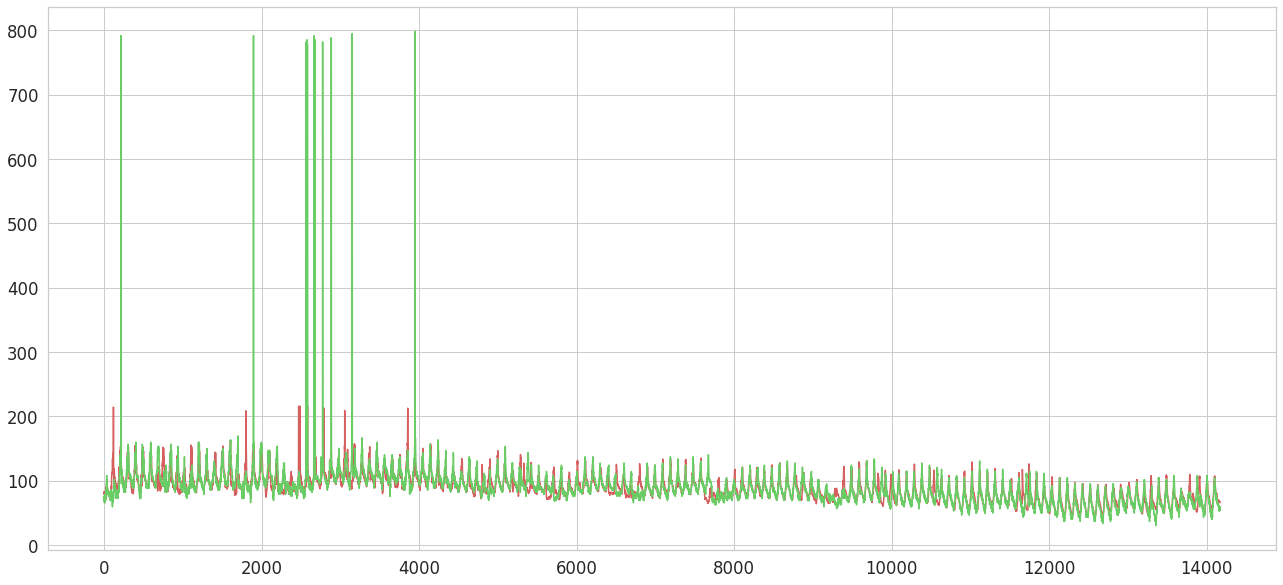

In [ ]:
X_train_pred = model.predict(X_train_mul)
print(X_train_pred.shape)
print(y_train_mul.shape)
plt.plot(scaler.inverse_transform(X_train_pred.reshape(-1,1)), 'r')
plt.plot(scaler.inverse_transform(X_train_mul[:,0,0].reshape(-1,1)), 'g')
plt.show()

## Distribution of Training Loss

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


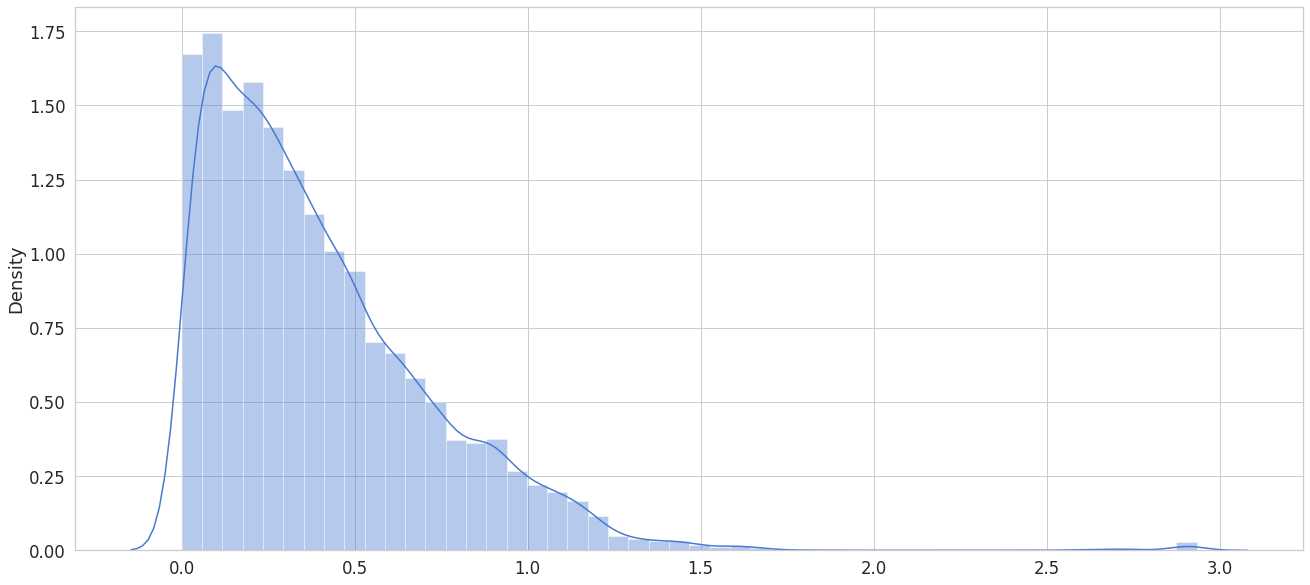

In [ ]:
X_train_pred = model.predict(X_train_mul)
train_mae_loss = np.mean(np.abs(X_train_pred.reshape(-1,1), X_train_mul[:,0,0].reshape(-1,1)), axis=1)
sns.distplot(train_mae_loss, bins=50, kde=True)

## Fitting the test distribution

(3471,)


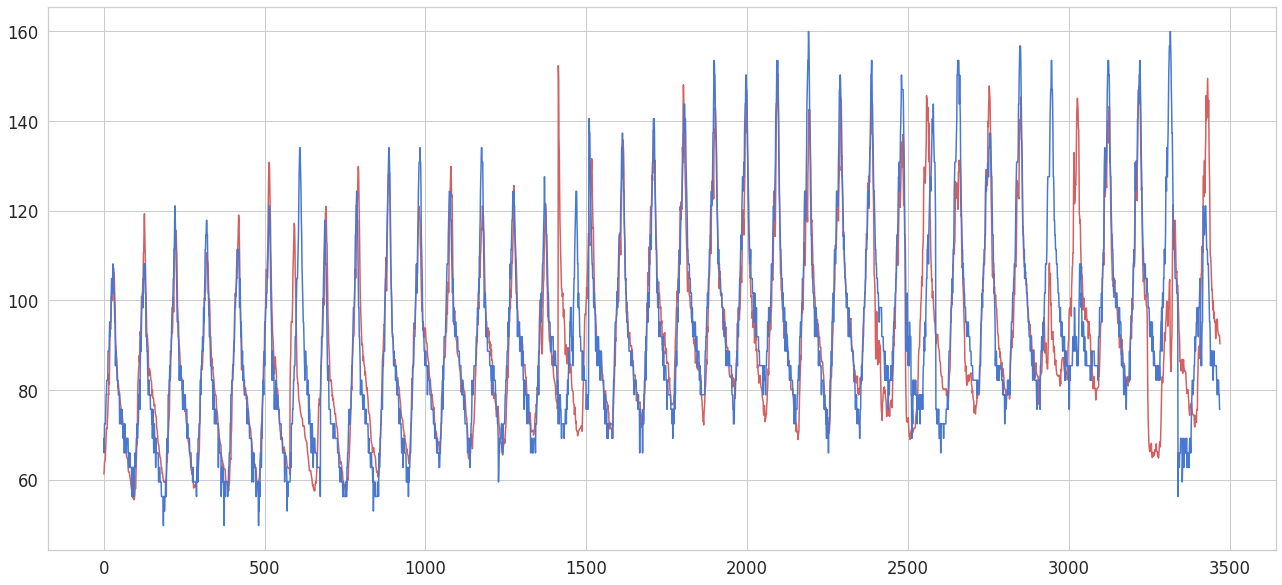

In [ ]:
X_test_mul_pred = model.predict(X_test_mul)
print(y_test_mul.shape)
plt.plot(scaler.inverse_transform(X_test_mul_pred.reshape(-1,1)), 'r')
plt.plot(scaler.inverse_transform(X_test_mul[:,0,0].reshape(-1,1)), 'b')
plt.show()

## Distribution of Testing Loss

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


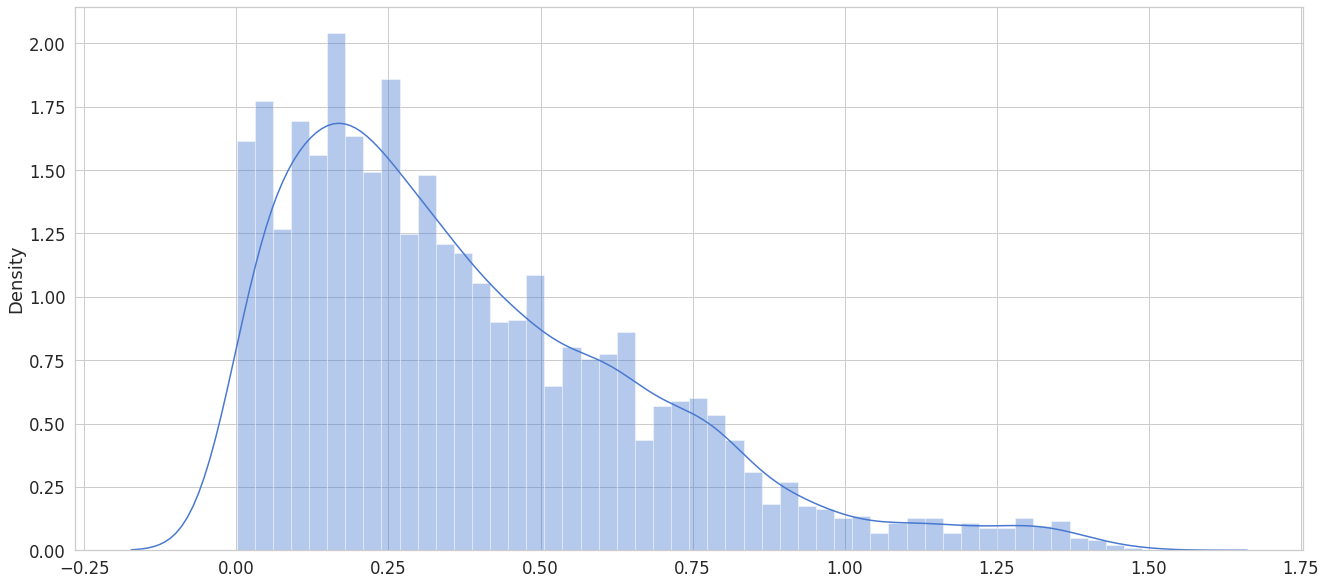

In [ ]:
X_test_pred = model.predict(X_test_mul)
test_mae_loss = np.mean(np.abs(X_test_pred.reshape(-1,1), X_test_mul[:,0,0].reshape(-1,1)), axis=1)
sns.distplot(test_mae_loss, bins=50, kde=True)

## Visualizing the threshold effect on test

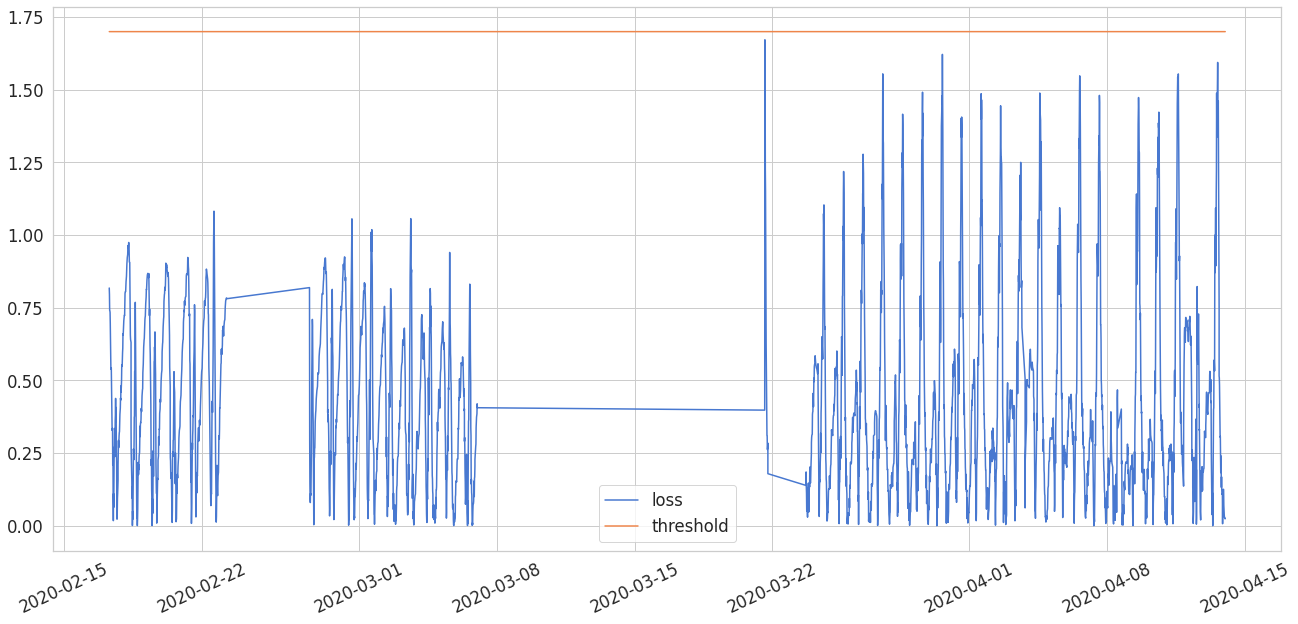

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
(3471,)
<class 'numpy.ndarray'>
(3471, 1)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
(33,)
       loss  threshold  OTI
count   0.0        0.0  0.0
mean    NaN        NaN  NaN
std     NaN        NaN  NaN
min     NaN        NaN  NaN
25%     NaN        NaN  NaN
50%     NaN        NaN  NaN
75%     NaN        NaN  NaN
max     NaN        NaN  NaN


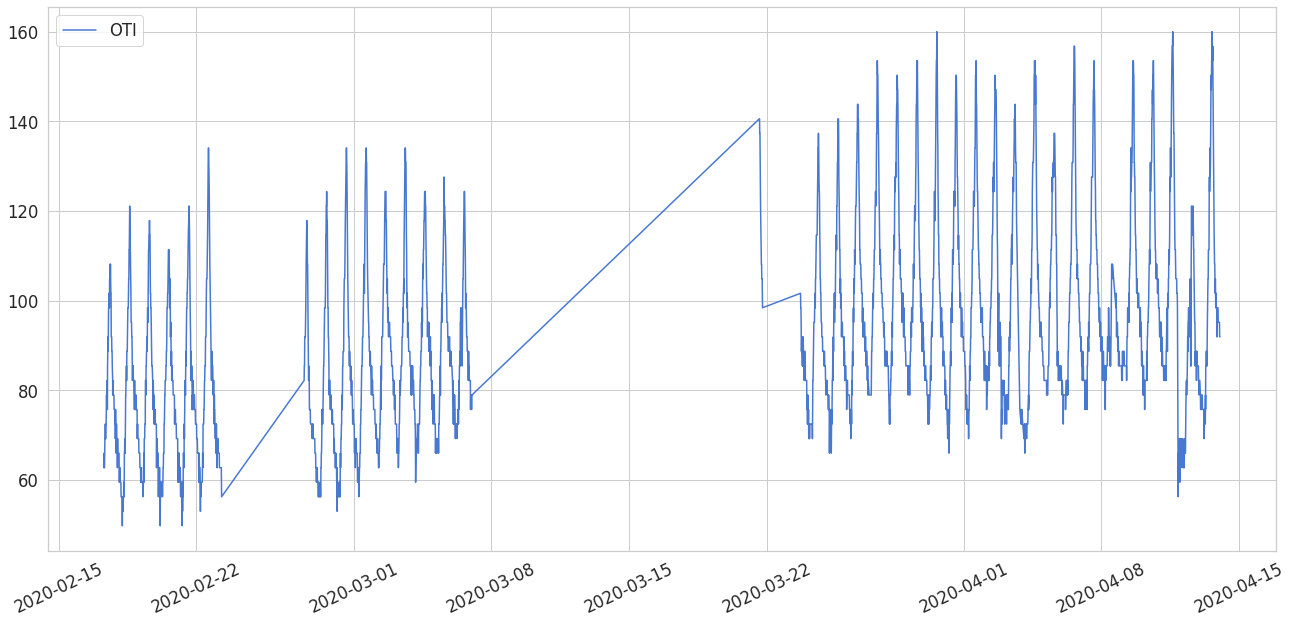

In [ ]:
THRESHOLD = 1.7

test_score_df = pd.DataFrame(index=test_data[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
# test_score_df['threshold'] = test_score_df['loss'].ewm(com=50).mean()
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['OTI'] = test_data[TIME_STEPS:].OTI

plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()
plt.show()

rescaled_test_x = test_data[TIME_STEPS:].index
print(type(rescaled_test_x))
print((rescaled_test_x).shape)
rescaled_test_data = scaler.inverse_transform(test_data[TIME_STEPS:].OTI.values.reshape(-1,1))
print(type(rescaled_test_data))
print((rescaled_test_data).shape)

rescaled_test_an = anomalies.index
print(type(rescaled_test_an))
print((rescaled_test_an).shape)
# rescaled_anomal_data = scaler.inverse_transform(anomalies.OTI.values.reshape(-1,1))
# print(type(rescaled_anomal_data))
# print((rescaled_anomal_data.flatten()).shape)

anomalies = test_score_df[test_score_df.anomaly == True]
print(anomalies.describe())

anomalies = test_score_df[test_score_df.anomaly == True]
plt.plot(rescaled_test_x, 
         rescaled_test_data, 
         label='OTI')

# sns.scatterplot(rescaled_test_an, 
#                 rescaled_anomal_data.flatten(),
#                 color=sns.color_palette()[3],
#                 s=52, 
#                 label='anomaly')

plt.xticks(rotation=25)
plt.legend();

## Visualizing the threshold effect on train

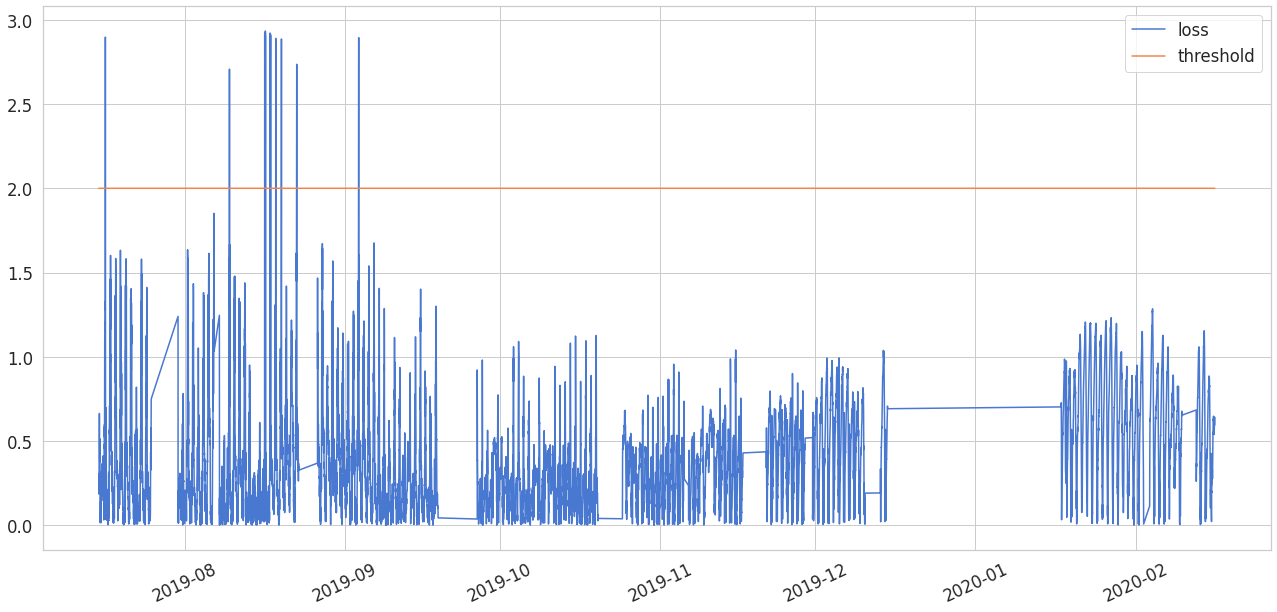

            loss  threshold        OTI
count  33.000000       33.0  33.000000
mean    2.840781        2.0  13.546860
std     0.109341        0.0   8.256475
min     2.591874        2.0   0.551118
25%     2.736121        2.0   1.703013
50%     2.900287        2.0  18.804229
75%     2.912304        2.0  18.981444
max     2.933856        2.0  19.335873
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
(14169,)
<class 'numpy.ndarray'>
(14169, 1)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
(33,)
<class 'numpy.ndarray'>
(33,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


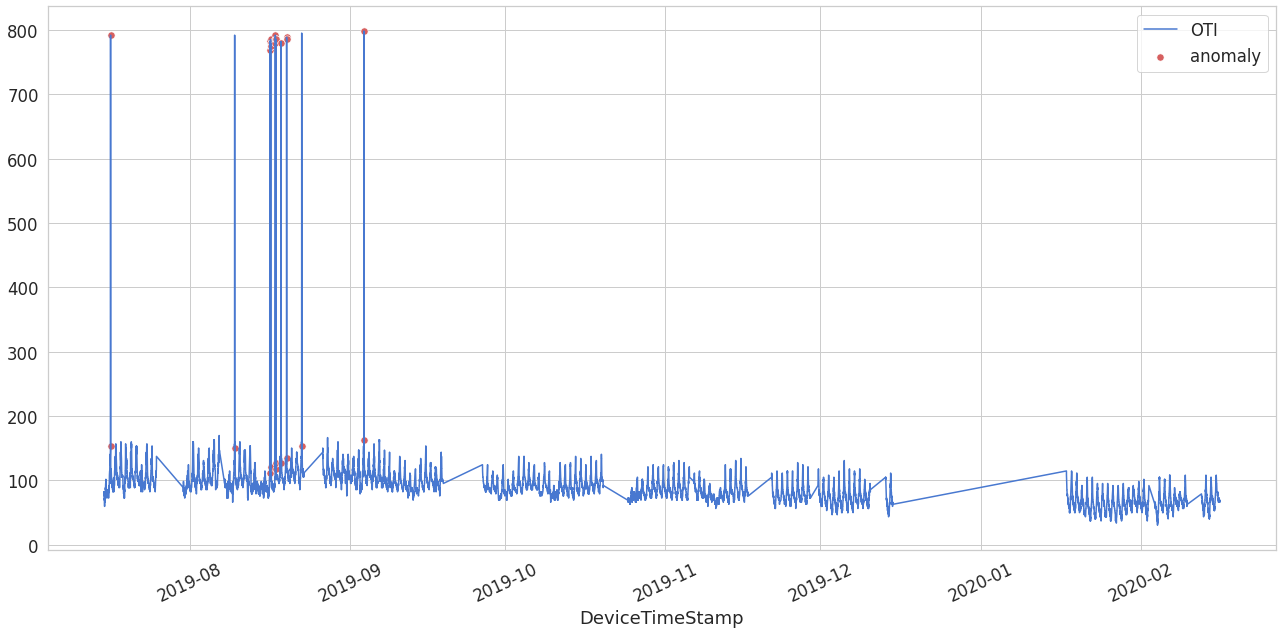

In [ ]:
THRESHOLD = 2.0

train_score_df = pd.DataFrame(index=train_data[TIME_STEPS:].index)
train_score_df['loss'] = train_mae_loss
train_score_df['threshold'] = THRESHOLD
train_score_df['anomaly'] = train_score_df.loss > train_score_df.threshold
train_score_df['OTI'] = train_data[TIME_STEPS:].OTI

plt.plot(train_score_df.index, train_score_df.loss, label='loss')
plt.plot(train_score_df.index, train_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend()
plt.show()

anomalies = train_score_df[train_score_df.anomaly == True]
print(anomalies.describe())

anomalies = train_score_df[train_score_df.anomaly == True]

rescaled_train_x = train_data[TIME_STEPS:].index
print(type(rescaled_train_x))
print((rescaled_train_x).shape)
rescaled_train_data = scaler.inverse_transform(train_data[TIME_STEPS:].OTI.values.reshape(-1,1))
print(type(rescaled_train_data))
print((rescaled_train_data).shape)

rescaled_train_an = anomalies.index
print(type(rescaled_train_an))
print((rescaled_train_an).shape)
rescaled_anomal_data = scaler.inverse_transform(anomalies.OTI.values.reshape(-1,1))
print(type(rescaled_anomal_data))
print((rescaled_anomal_data.flatten()).shape)


plt.plot(rescaled_train_x, 
         rescaled_train_data, 
         label='OTI')

sns.scatterplot(rescaled_train_an, 
                rescaled_anomal_data.flatten(),
                color=sns.color_palette()[3],
                s=52, 
                label='anomaly')

plt.xticks(rotation=25)
plt.legend();

## Confusion Matrix


In [ ]:
test_x_predictions = model.predict(X_test_mul)
test_mae_loss = np.mean(np.abs(test_x_predictions.reshape(-1,1), X_test_mul[:,0].reshape(-1,1)), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': test_mae_loss,
                        'True_class': X_test_mul_data[:,0,4]})

ValueError: ignored

In [ ]:
train_x_predictions = model.predict(X_train_mul)
mse, mae, rmse, smapev, r2 = regression_metrics(X_train_mul[:,0,0], train_x_predictions)
train_mae_loss = np.mean(np.abs(train_x_predictions.reshape(-1,1), X_train_mul[:,0,0].reshape(-1,1)), axis=1)
error_df_train = pd.DataFrame({'Reconstruction_error': train_mae_loss,
                        'True_class': X_train_mul_data[:,0,4]})

In [ ]:
threshold_fixed = 2.0
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomaly" if name == 'Anomaly' else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();
plt.clf()

In [ ]:
threshold_fixed = 1.0
groups = error_df_train.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Anomaly" if name == 'Anomaly' else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and anomaly data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
error_df_train.replace({'Anomaly':1, 'Normal':0}, inplace=True)
error_df_train['True_class']

In [ ]:
threshold_fixed = 0.7
error_df_train['Anomaly'] = error_df_train['Reconstruction_error'] > threshold_fixed
error_df_train.replace({True:0, False:1}, inplace=True)
pred_y = 1-error_df_train.Anomaly
true_y = error_df_train.True_class.values

print(Counter(true_y))
print(Counter(pred_y))
import pycm
cm = pycm.ConfusionMatrix(actual_vector=np.array(true_y.astype(float)), predict_vector=np.array(pred_y.astype(float)))
cm.relabel(mapping={0:"Normal",1:"Anomaly"})
print(cm)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

# Time Series Decomposition

In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-dsfyl7yc
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-dsfyl7yc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
ERROR: Package 'statsmodels' requires a different Python: 3.7.12 not in '>=3.8'


In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
stl = STL(train.OTI, period=20)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

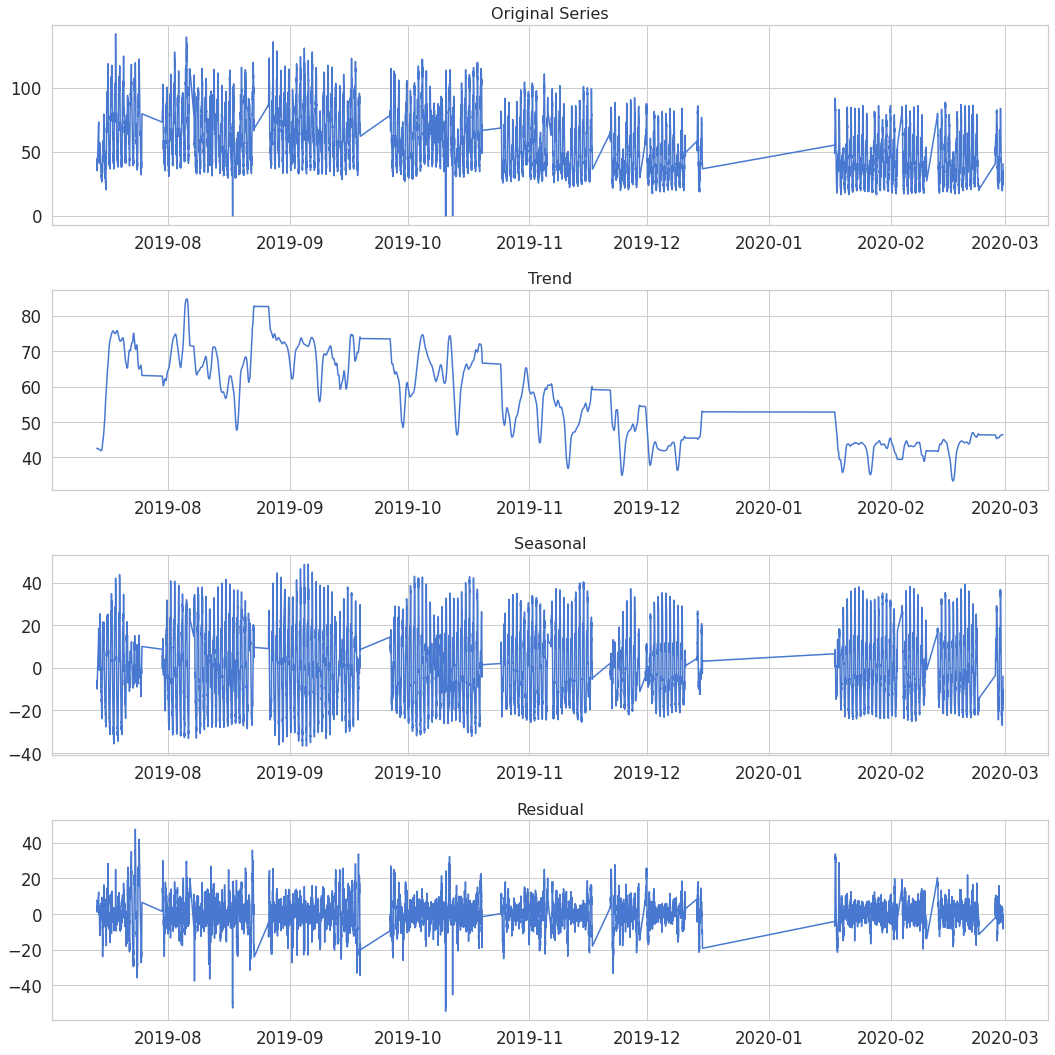

In [ ]:

plt.figure(figsize=(15,15))

plt.subplot(4,1,1)
plt.plot(train.KW)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

In [ ]:
!pip install --upgrade git+https://github.com/ariaghora/robust-period.git

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from robustperiod import robust_period, robust_period_full, plot_robust_period

In [ ]:

lmb = 1e+6
c = 2
num_wavelets = 8
zeta = 1.345

periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
    df.OTI, 'db10', num_wavelets, lmb, c, zeta)
plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)

Calculating periodogram for level 1


KeyboardInterrupt: ignored

In [ ]:
lmb = 1e+6
c = 2
num_wavelets = 8
zeta = 1.345

periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
    df.IL1, 'db10', num_wavelets, lmb, c, zeta)
plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)

In [ ]:
periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
    df.IL2, 'db10', num_wavelets, lmb, c, zeta)
plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)

In [ ]:
periods, W, bivar, periodograms, p_vals, ACF = robust_period_full(
    df.IL3, 'db10', num_wavelets, lmb, c, zeta)
plot_robust_period(periods, W, bivar, periodograms, p_vals, ACF)